# Clickstream Data for Online Shopping

## Задание 3: Анализ кликовых данных для оптимизации онлайн-магазина

**Автор:** Собченко Анастасия Алексеевна   
**Дата:** 25 сентября 2024 г.  
**Версия:** 1.0  

---

## Описание задач проекта

1. Изучение структуры данных: Разберите структуру данных и определите, какие действия пользователи совершают на сайте. Постройте диаграммы, отображающие наиболее популярные пути, которые проходят пользователи

2. Проведение анализа: Определите точки выхода пользователей с сайта и страницы, на которых происходит наиболее частое взаимодействие. Проанализируйте, какие страницы приводят к высоким показателям конверсии, и какие — к отказам

3. Моделирование поведения пользователей: Постройте модели для предсказания вероятности того, что пользователь совершит покупку на основе его действий на сайте. Используйте методы кластеризации для сегментации пользователей по их поведению

4. Рекомендации: Сформируйте рекомендации для улучшения структуры сайта, на основании анализа точек выхода и конверсии. Предложите изменения в навигации сайта для увеличения конверсии

---

## Содержание

1. [Анализ данных](#1.-Анализ-данных)

- 1.1. [Импорт библиотек, загрузка данных. Описательная статистика](#1.1.-Импорт-библиотек,-загрузка-данных.-Описательная-статистика)
- 1.2. [Целевая переменная. Обработка данных](#1.2.-Целевая-переменная.-Обработка-данных)
- 1.3. [Анализ продуктов: Products](#1.3.-Анализ-продуктов:-Products)
- 1.4. [Анализ категорий продуктов. Признак PAGE 1 (MAIN CATEGORY). ](#1.4.-Анализ-категорий-продуктов.-Признак-PAGE-1-(MAIN-CATEGORY).)
- 1.5. [Анализ по цветам. Признак COLOR](#1.5.-Анализ-по-цветам.-Признак-COLOR)
- 1.6. [Анализ сайта. Признак Location. Структура сайта. Действия пользователя, клики по продуктам](#1.6.-Анализ-сайта.-Признак-Location.-Структура-сайта.-Действия-пользователя,-клики-по-продуктам)
- 1.7. [Анализ по странам. Признак COUNTRY](#1.7.-Анализ-по-странам.-Признак-COUNTRY)

2. [Модели прогнозирования временных рядов](#2.-Модели-прогнозирования-временных-рядов)

- 2.1. [Создание и визуализация](#2.1.-Создание-и-визуализация)
- 2.2. [Тест Дикки Фуллера. Стационарность временных рядов](#2.2.-Тест-Дикки-Фуллера.-Стационарность-временных-рядов)
- 2.3. [Прогнозирование временных рядов. Модели SARIMAX и auto arima](#2.3.-Прогнозирование-временных-рядов.-Модели-SARIMAX-и-auto-arima)


3. [Модели кластеризации. Сегментация пользователей (сессий)](#3.-Модели-кластеризации.-Сегментация-пользователей-(сессий))

- 3.1. [Данные о сессиях пользователей](#3.1.-Данные-о-сессиях-пользователей)
- 3.2. [Понижение размерности признаков (PCA, tSNE)](#3.2.-Понижение-размерности-признаков-(PCA,-tSNE))
- 3.3. [Метод k средних (kMeans)](#3.3.-Метод-k-средних-(kMeans))
- 3.4. [Метод KPrototypes](#3.4.-Метод-KPrototypes)
- 3.5. [Интерпретация результатов кластеризации](#3.5.-Интерпретация-результатов-кластеризации)


4. [Заключение](#4.-Заключение)

---

## Контакты

**Email:** lobzinastya@gmail.com  

# 1. Анализ данных

## 1.1. Импорт библиотек, загрузка данных. Описательная статистика

In [1]:
#pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, pairwise_distances





In [3]:
#Настройки оформления
#sns.set_style('white') 

palette_color = sns.color_palette('mako', n_colors = 7)
two_colors = [palette_color[2],palette_color[-1]]
one_color = palette_color[3]
palette_color


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Загружаем данные

In [4]:
file_path = ''

df = pd.read_csv(file_path + 'e-shop clothing 2008.csv', sep=';')
df.head(10)

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   
5  2008      4    1      6       29           1                       3   
6  2008      4    1      7       29           1                       3   
7  2008      4    1      8       29           1                       4   
8  2008      4    1      9       29           1                       4   
9  2008      4    1      1       29           2                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   
5                     C56       6         1                  2     57   
6                     C57       5         1                  2     33   
7                     P67       9         5                  1     38   
8                     P82       6         4                  2     48   
9                     B31       9         5                  1     57   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1  
5        1     4  
6        2     4  
7        1     4  
8        1     5  
9        1     2

Проверяем типы данных, наличие нулевых значений (отсутствуют)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

Описательная статистика для числовых столбцов и для столбца со строками

In [6]:
df.describe().T

count          mean          std     min     25%  \
year                    165474.0   2008.000000     0.000000  2008.0  2008.0   
month                   165474.0      5.585887     1.328160     4.0     4.0   
day                     165474.0     14.524554     8.830374     1.0     7.0   
order                   165474.0      9.817476    13.478411     1.0     2.0   
country                 165474.0     26.952621     7.150691     1.0    29.0   
session ID              165474.0  12058.417056  7008.418903     1.0  5931.0   
page 1 (main category)  165474.0      2.400842     1.144420     1.0     1.0   
colour                  165474.0      6.227655     4.235606     1.0     3.0   
location                165474.0      3.258198     1.713206     1.0     2.0   
model photography       165474.0      1.260071     0.438674     1.0     1.0   
price                   165474.0     43.802507    12.548131    18.0    33.0   
price 2                 165474.0      1.488167     0.499861     1.0     1.0   
page                    165474.0      1.710166     0.982412     1.0     1.0   

                            50%      75%      max  
year                     2008.0   2008.0   2008.0  
month                       5.0      7.0      8.0  
day                        14.0     22.0     31.0  
order                       6.0     12.0    195.0  
country                    29.0     29.0     47.0  
session ID              11967.5  18219.0  24026.0  
page 1 (main category)      2.0      3.0      4.0  
colour                      4.0      9.0     14.0  
location                    3.0      5.0      6.0  
model photography           1.0      2.0      2.0  
price                      43.0     52.0     82.0  
price 2                     1.0      2.0      2.0  
page                        1.0      2.0      5.0

In [7]:
df.describe(include='object').T

count unique top  freq
page 2 (clothing model)  165474    217  B4  3579

## 1.2. Целевая переменная. Обработка данных

**Про целевую переменную**

Одна из частей задания к проекту "Проанализируйте, какие страницы приводят к высоким показателям конверсии, и какие — к отказам" и "Постройте модели для предсказания вероятности того, что пользователь совершит покупку на основе его действий на сайте "

К сожалению, в представленных данных нет информации о конверсиях для такого целевого действия как, например, покупка (это было дополнительно подтверждено администраторами курса в ответ на вопросы других слушателей курса). Соответственно, совсем неясно, для какой целевой переменной нужно строить модель. 

Тем не менее, продолжим анализ имеющихся данных, чтобы извлечь максимум из предоставленной информации и попробовать рассмотреть другие вопросы и найти подходящую "проблематику" для проекта.

### 1.2.1. Дата

In [8]:
df['year'].value_counts()

year
2008    165474
Name: count, dtype: int64

Можно было бы удалить столбец год, но у нас есть еще день и месяц, поэтому сначала преобразуем эти 3 столбца в дату

In [9]:
# df['day'].value_counts()
# df['month'].value_counts()

In [10]:
date_columns =['year','month', 'day']
df['date'] = pd.to_datetime(df[date_columns])

Из стобца 'date' мы дополнительно можем получить день недели, и из дня недели информацию о том, был ли это выходной день

Также удаляем изначальные столбцы [год, месяц, день]

In [11]:
df['weekday'] = df['date'].dt.weekday
df['weekend'] =  (df['weekday']>4).astype('int') #если weekday in [5,6] то это выходной
df.drop(columns = date_columns, inplace=True)
df

order  country  session ID  page 1 (main category)  \
0           1       29           1                       1   
1           2       29           1                       1   
2           3       29           1                       2   
3           4       29           1                       2   
4           5       29           1                       2   
...       ...      ...         ...                     ...   
165469      1       29       24024                       2   
165470      1        9       24025                       1   
165471      1       34       24026                       1   
165472      2       34       24026                       3   
165473      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page       date  weekday  weekend  
0             2     1 2008-04-01        1        0  
1             2     1 2008-04-01        1        0  
2             1     1 2008-04-01        1        0  
3             2     1 2008-04-01        1        0  
4             1     1 2008-04-01        1        0  
...         ...   ...        ...      ...      ...  
165469        1     1 2008-08-13        2        0  
165470        1     1 2008-08-13        2        0  
165471        2     1 2008-08-13        2        0  
165472        1     1 2008-08-13        2        0  
165473        1     1 2008-08-13        2        0  

[165474 rows x 14 columns]

Описательная статистика для новых столбцов

In [12]:
df[['date', 'weekend', 'weekday']].describe().T

count                           mean                  min  \
date       165474  2008-06-01 16:19:04.000870400  2008-04-01 00:00:00   
weekend  165474.0                       0.214759                  0.0   
weekday  165474.0                        2.70654                  0.0   

                         25%                  50%                  75%  \
date     2008-04-25 00:00:00  2008-05-30 00:00:00  2008-07-08 00:00:00   
weekend                  0.0                  0.0                  0.0   
weekday                  1.0                  3.0                  4.0   

                         max       std  
date     2008-08-13 00:00:00       NaN  
weekend                  1.0  0.410656  
weekday                  6.0  1.926736

### 1.2.2. Признаки price и price 2

Согласно данным из описания датасета:

PRICE -> price in US dollars

PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes
2-no

Преобразуем столбец price 2. Фактически он обозначает индикатор, больше ли цена данного продукта средней цены для данной категории продуктов


In [13]:
df['is_higher_price'] = df['price 2'].map({2:0, 1:1})
df.drop(columns=['price 2'], inplace=True)
df

order  country  session ID  page 1 (main category)  \
0           1       29           1                       1   
1           2       29           1                       1   
2           3       29           1                       2   
3           4       29           1                       2   
4           5       29           1                       2   
...       ...      ...         ...                     ...   
165469      1       29       24024                       2   
165470      1        9       24025                       1   
165471      1       34       24026                       1   
165472      2       34       24026                       3   
165473      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        page       date  weekday  weekend  is_higher_price  
0          1 2008-04-01        1        0                0  
1          1 2008-04-01        1        0                0  
2          1 2008-04-01        1        0                1  
3          1 2008-04-01        1        0                0  
4          1 2008-04-01        1        0                1  
...      ...        ...      ...      ...              ...  
165469     1 2008-08-13        2        0                1  
165470     1 2008-08-13        2        0                1  
165471     1 2008-08-13        2        0                0  
165472     1 2008-08-13        2        0                1  
165473     1 2008-08-13        2        0                1  

[165474 rows x 14 columns]

### 1.2.3. Признак Model photography

MODEL PHOTOGRAPHY -> variable with two categories: 

1- en face (анфас)

2- profile (профиль)

In [14]:
df['model photography'].value_counts()

model photography
1    122439
2     43035
Name: count, dtype: int64

Преобразуем этот столбец в новую переменную is_photo_w_profile (is photo profile, сделано ли фото в профиль)

In [15]:
df['is_photo_profile'] = df['model photography'].map({1:0, 2:1})
df.drop(columns = 'model photography', inplace=True)
df

order  country  session ID  page 1 (main category)  \
0           1       29           1                       1   
1           2       29           1                       1   
2           3       29           1                       2   
3           4       29           1                       2   
4           5       29           1                       2   
...       ...      ...         ...                     ...   
165469      1       29       24024                       2   
165470      1        9       24025                       1   
165471      1       34       24026                       1   
165472      2       34       24026                       3   
165473      3       34       24026                       2   

       page 2 (clothing model)  colour  location  price  page       date  \
0                          A13       1         5     28     1 2008-04-01   
1                          A16       1         6     33     1 2008-04-01   
2                           B4      10         2     52     1 2008-04-01   
3                          B17       6         6     38     1 2008-04-01   
4                           B8       4         3     52     1 2008-04-01   
...                        ...     ...       ...    ...   ...        ...   
165469                     B10       2         4     67     1 2008-08-13   
165470                     A11       3         4     62     1 2008-08-13   
165471                      A2       3         1     43     1 2008-08-13   
165472                      C2      12         1     43     1 2008-08-13   
165473                      B2       3         1     57     1 2008-08-13   

        weekday  weekend  is_higher_price  is_photo_profile  
0             1        0                0                 0  
1             1        0                0                 0  
2             1        0                1                 0  
3             1        0                0                 1  
4             1        0                1                 1  
...         ...      ...              ...               ...  
165469        2        0                1                 0  
165470        2        0                1                 0  
165471        2        0                0                 0  
165472        2        0                1                 0  
165473        2        0                1                 1  

[165474 rows x 14 columns]

### 1.2.4. Признак ORDER

ORDER -> sequence of clicks during one session

То есть order это не заказ, а порядковый номер клика по товару в определенной сессии. 

In [16]:
df['order'].nunique()

195

Всего есть 195 уникальных значений (то есть предположительно есть сессия из 195 кликов)

Но вдруг order вопреки логике для какой-то сессии из n кликов не нумеруются 1, 2, 3,...n

Можно это проверить и убедиться, что мы правильно поняли структуру данных

In [17]:
%%time 

unique_sessions = df['session ID'].unique()
N = len(unique_sessions)

j = 0
flag = True
while flag and j < N:
    session_mask = df['session ID'] == unique_sessions[j]
    order_values = sorted(df[session_mask]['order'].to_list())
    n = len(order_values)
    if order_values != list(range(1,n+1)):
        flag = False
        print(df[session_mask])

    j +=1
print('Во всех сессиях order указаны правильно (по структуре) \nт.е. если в данных есть n записей о сессиях с одинаковым номеров ID, то будут order в них 1,2,3, ...n? \n',flag)

Во всех сессиях order указаны правильно (по структуре) 
т.е. если в данных есть n записей о сессиях с одинаковым номеров ID, то будут order в них 1,2,3, ...n? 
 True
CPU times: total: 5.08 s
Wall time: 12.7 s


In [18]:
print('Всего уникальных ID сессий: ', N)

Всего уникальных ID сессий:  24026


Это не говорит о том, сколько разных пользователей было на сайте. Пользователь != сессия

Но мы можем в дальнейшем сгруппировать данные по сессиям, чтобы изучить их, как новую "сущность"

### 1.2.5. Корреляции

In [19]:
df.columns

Index(['order', 'country', 'session ID', 'page 1 (main category)',
       'page 2 (clothing model)', 'colour', 'location', 'price', 'page',
       'date', 'weekday', 'weekend', 'is_higher_price', 'is_photo_profile'],
      dtype='object')

Среди всех наших колонок выделим отдельно те, что хоть немного можно считать числовыми, а не категориальными или датами (хотя конечно page, page 1 (main category), location, weekday, order, которые все принимают детерменированные значения - в большем смысле категориальные) и построим матрицу корреляций для этих признаков

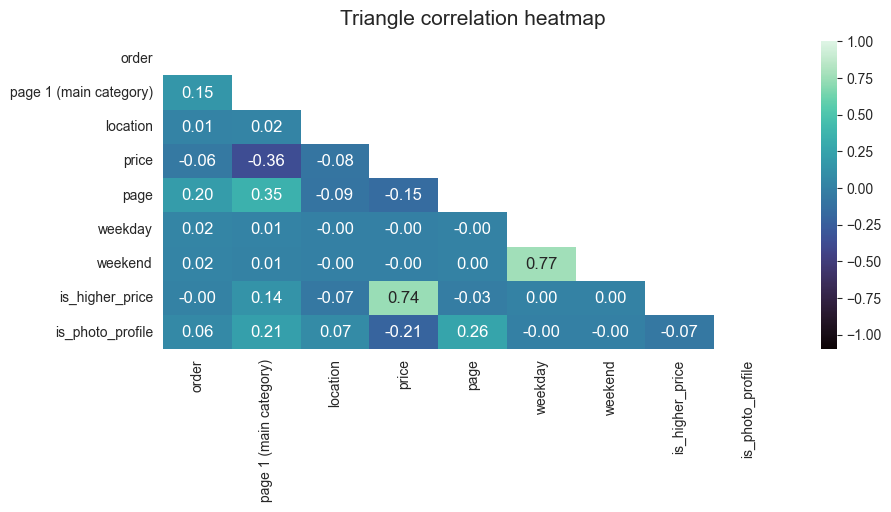

In [20]:
sns.set_style('white') 
columns_for_corr = ['order','page 1 (main category)', 'location', 'price', 'page', 'weekday', 'weekend', 'is_higher_price', 'is_photo_profile']
corr_matr = df[columns_for_corr].corr()
mask = np.triu(np.ones_like(corr_matr, dtype='bool'))
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(corr_matr, mask=mask,vmin=1, vmax=-1, annot=True,fmt=".2f", cmap=sns.color_palette("mako", as_cmap=True), annot_kws={'size': 12})
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':15}, pad=12)
plt.show()

По результатам матрицы корреляций очевидно, что weekday и weekend сильно скоррелированы между собой, так же примерно как и price, is_higher_price

## 1.3. Анализ продуктов: Products



PAGE 1 (MAIN CATEGORY) -> concerns the main product category

PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
(217 products)

COLOUR -> colour of product

LOCATION -> photo location on the page, the screen has been divided into six parts:

MODEL PHOTOGRAPHY -> variable with two categories: 

PRICE -> price in US dollars

PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

PAGE -> page number within the e-store website (from 1 to 5)

In [21]:
df

order  country  session ID  page 1 (main category)  \
0           1       29           1                       1   
1           2       29           1                       1   
2           3       29           1                       2   
3           4       29           1                       2   
4           5       29           1                       2   
...       ...      ...         ...                     ...   
165469      1       29       24024                       2   
165470      1        9       24025                       1   
165471      1       34       24026                       1   
165472      2       34       24026                       3   
165473      3       34       24026                       2   

       page 2 (clothing model)  colour  location  price  page       date  \
0                          A13       1         5     28     1 2008-04-01   
1                          A16       1         6     33     1 2008-04-01   
2                           B4      10         2     52     1 2008-04-01   
3                          B17       6         6     38     1 2008-04-01   
4                           B8       4         3     52     1 2008-04-01   
...                        ...     ...       ...    ...   ...        ...   
165469                     B10       2         4     67     1 2008-08-13   
165470                     A11       3         4     62     1 2008-08-13   
165471                      A2       3         1     43     1 2008-08-13   
165472                      C2      12         1     43     1 2008-08-13   
165473                      B2       3         1     57     1 2008-08-13   

        weekday  weekend  is_higher_price  is_photo_profile  
0             1        0                0                 0  
1             1        0                0                 0  
2             1        0                1                 0  
3             1        0                0                 1  
4             1        0                1                 1  
...         ...      ...              ...               ...  
165469        2        0                1                 0  
165470        2        0                1                 0  
165471        2        0                0                 0  
165472        2        0                1                 0  
165473        2        0                1                 1  

[165474 rows x 14 columns]

Все перечисленные и описанные выше столбцы - это характеристики продукта, на которые в ходе сессии (конкретной session ID на каком-то шаге этой сессии №order кликает пользователь)

Но что мы знаем про этот продукт? Кажется, что основное это "page 2 (clothing model)". Но может ли быть у одной такой модели продукта (например А2) разная цена, разная страница сайта, разный цвет, разная локация? Или модель однозначно определит эти характеристики

Попробуем в этом разобраться

In [22]:
print('Количество уникальных clothing model:', df['page 2 (clothing model)'].nunique())
print(*sorted(df['page 2 (clothing model)'].unique()))

Количество уникальных clothing model: 217
A1 A10 A11 A12 A13 A14 A15 A16 A17 A18 A19 A2 A20 A21 A22 A23 A24 A25 A26 A27 A28 A29 A3 A30 A31 A32 A33 A34 A35 A36 A37 A38 A39 A4 A40 A41 A42 A43 A5 A6 A7 A8 A9 B1 B10 B11 B12 B13 B14 B15 B16 B17 B19 B2 B20 B21 B22 B23 B24 B25 B26 B27 B28 B29 B3 B30 B31 B32 B33 B34 B4 B5 B6 B7 B8 B9 C1 C10 C11 C12 C13 C14 C15 C16 C17 C18 C19 C2 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C3 C30 C31 C32 C33 C34 C35 C36 C37 C38 C39 C4 C40 C41 C42 C43 C44 C45 C46 C47 C48 C49 C5 C50 C51 C52 C53 C54 C55 C56 C57 C58 C59 C6 C7 C8 C9 P1 P10 P11 P12 P13 P14 P15 P16 P17 P18 P19 P2 P20 P21 P22 P23 P24 P25 P26 P27 P28 P29 P3 P30 P31 P32 P33 P34 P35 P36 P37 P38 P39 P4 P40 P41 P42 P43 P44 P45 P46 P47 P48 P49 P5 P50 P51 P52 P53 P54 P55 P56 P57 P58 P59 P6 P60 P61 P62 P63 P64 P65 P66 P67 P68 P69 P7 P70 P71 P72 P73 P74 P75 P76 P77 P78 P79 P8 P80 P81 P82 P9


In [23]:
products = pd.DataFrame(df.groupby(
    by=['page 2 (clothing model)','page 1 (main category)','colour','location', 'is_photo_profile', 'price','page', 'is_higher_price'])['session ID'].count().reset_index().rename(columns={'session ID':'sessions'}))
products

page 2 (clothing model)  page 1 (main category)  colour  location  \
0                        A1                       1       8         1   
1                       A10                       1       3         4   
2                       A11                       1       3         4   
3                       A12                       1       2         4   
4                       A13                       1       1         5   
..                      ...                     ...     ...       ...   
213                      P8                       4       2         3   
214                     P80                       4       7         3   
215                     P81                       4       4         3   
216                     P82                       4       6         4   
217                      P9                       4       4         3   

     is_photo_profile  price  page  is_higher_price  sessions  
0                   0     28     1                0      2265  
1                   0     38     1                0      2280  
2                   0     62     1                1      2789  
3                   0     38     1                0      2010  
4                   0     28     1                0      1577  
..                ...    ...   ...              ...       ...  
213                 0     28     1                0       661  
214                 0     28     5                0       222  
215                 1     43     5                1       202  
216                 1     48     5                1       725  
217                 1     23     1                0       612  

[218 rows x 9 columns]

Видим, что изначально у нас было 217 уникальных идентификаторов модели, но когда мы группировали данные по совокупности столбцов ['page 2 (clothing model)','page 1 (main category)','colour','location', 'is_photo_profile', 'price','page', 'is_higher_price']
количество сгруппированных строк 218. 

Это означает, что есть дубликаты и 1 модель с одинаковым номером встречаться с разными ценами или на разных страницах. Проверим это

In [24]:
products[products.duplicated(subset = ['page 2 (clothing model)'], keep=False)]

page 2 (clothing model)  page 1 (main category)  colour  location  \
9                      A18                       1       4         6   
10                     A18                       2       4         6   

    is_photo_profile  price  page  is_higher_price  sessions  
9                  0     38     1                0       937  
10                 0     38     1                0         1

Мы нашли дубликат для модели A18. Она встретилась в 938 сессиях, но в одной из них page 1 main category == 2, а в остальных 937 ==1. 

Похоже на ошибку

Проверим гипотезу, что первая буква в названии модели соответствует категории

In [25]:
model_cat_df = pd.DataFrame(df.groupby('page 1 (main category)')['page 2 (clothing model)'].agg(list))
model_cat_df

page 2 (clothing model)
page 1 (main category)                                                   
1                       [A13, A16, A10, A10, A34, A37, A11, A18, A1, A...
2                       [B4, B17, B8, B31, B21, B24, B27, B27, B17, B1...
3                       [C56, C57, C4, C7, C10, C17, C4, C25, C21, C7,...
4                       [P67, P82, P1, P34, P33, P77, P60, P56, P55, P...

Подробно:

In [26]:
for i in range(1,5):
    models_set = set(model_cat_df.loc[i]['page 2 (clothing model)'])
    print('Категория:', i)
    print('Модели в данной категории',models_set)
    print('Всего', len(models_set))
    s = str(models_set)
    print(f"Букв А:{s.count('A')}, B:{s.count('B')}, C:{s.count('C')}, P:{s.count('P')}", end ='\n\n')

Категория: 1
Модели в данной категории {'A23', 'A12', 'A15', 'A10', 'A43', 'A11', 'A7', 'A22', 'A20', 'A14', 'A24', 'A30', 'A4', 'A38', 'A2', 'A41', 'A33', 'A34', 'A16', 'A5', 'A37', 'A6', 'A29', 'A36', 'A39', 'A31', 'A28', 'A3', 'A1', 'A40', 'A21', 'A26', 'A27', 'A18', 'A35', 'A9', 'A25', 'A19', 'A8', 'A32', 'A13', 'A42', 'A17'}
Всего 43
Букв А:43, B:0, C:0, P:0

Категория: 2
Модели в данной категории {'B5', 'B26', 'B20', 'B33', 'B29', 'B23', 'B4', 'B12', 'B16', 'B17', 'B9', 'B14', 'B34', 'B32', 'B22', 'B21', 'B28', 'B6', 'B24', 'B8', 'B30', 'B31', 'B1', 'B11', 'B3', 'A18', 'B2', 'B27', 'B19', 'B10', 'B25', 'B15', 'B13', 'B7'}
Всего 34
Букв А:1, B:33, C:0, P:0

Категория: 3
Модели в данной категории {'C25', 'C29', 'C38', 'C28', 'C20', 'C16', 'C19', 'C23', 'C52', 'C55', 'C50', 'C27', 'C32', 'C9', 'C40', 'C57', 'C11', 'C2', 'C10', 'C41', 'C12', 'C43', 'C22', 'C24', 'C36', 'C44', 'C15', 'C7', 'C5', 'C51', 'C18', 'C31', 'C45', 'C47', 'C48', 'C30', 'C4', 'C21', 'C17', 'C14', 'C13', 'C42', 

Действительно, в категории 1 у нас все модели начинаются с 'A', в категории 3: 'C', в категории 4:'P'

И только в категорию 2 среди всех моделей с буквой B  у нас попалась 1 раз модель А 18.

Думаю, что сессия, где для модели А18 категория 2 (а не 1 как в 937 остальных) - это техническая ошибка в данных,
которую можно и нужно исправить!

In [27]:
df[(df['page 2 (clothing model)'] == 'A18') & (df['page 1 (main category)']==2)]

order  country  session ID  page 1 (main category)  \
19001     27       29        2766                       2   

      page 2 (clothing model)  colour  location  price  page       date  \
19001                     A18       4         6     38     1 2008-04-10   

       weekday  weekend  is_higher_price  is_photo_profile  
19001        3        0                0                 0

In [28]:
#Исправляем ошибку
#df.iloc[19001]['page 1 (main category)'] = 1
df.loc[df['page 2 (clothing model)'] == 'A18', 'page 1 (main category)'] = 1

И заново сформируем таблицу с продуктами (моделями)

In [29]:
products = pd.DataFrame(df.groupby(
    by=['page 2 (clothing model)','page 1 (main category)','colour','location', 'is_photo_profile', 'price','page', 'is_higher_price'])['session ID'].count().reset_index().rename(columns={'session ID':'sessions'}))

Переименуем некоторые столбцы и проверим сохранение размерности данных (Данные агрегировались так, что в столбец sessions попадало количество count строк с данным товаров, то есть клики на этот товар, так что и назовем этот столбец clicks - клики)

In [30]:
products.rename(columns={'page 2 (clothing model)':'model', 'sessions':'clicks'}, inplace=True)

print('Равна ли сумма всех кликов для продуктов в таблице product числу строк в начальном датасете: ',products.clicks.sum() == df.shape[0])

Равна ли сумма всех кликов для продуктов в таблице product числу строк в начальном датасете:  True


In [31]:
products

model  page 1 (main category)  colour  location  is_photo_profile  price  \
0      A1                       1       8         1                 0     28   
1     A10                       1       3         4                 0     38   
2     A11                       1       3         4                 0     62   
3     A12                       1       2         4                 0     38   
4     A13                       1       1         5                 0     28   
..    ...                     ...     ...       ...               ...    ...   
212    P8                       4       2         3                 0     28   
213   P80                       4       7         3                 0     28   
214   P81                       4       4         3                 1     43   
215   P82                       4       6         4                 1     48   
216    P9                       4       4         3                 1     23   

     page  is_higher_price  clicks  
0       1                0    2265  
1       1                0    2280  
2       1                1    2789  
3       1                0    2010  
4       1                0    1577  
..    ...              ...     ...  
212     1                0     661  
213     5                0     222  
214     5                1     202  
215     5                1     725  
216     1                0     612  

[217 rows x 9 columns]

Таким образом, получили таблицу с данными обо всех продуктах с агрегированными данными по кликам для этих продуктов

## 1.4. Анализ категорий продуктов. Признак PAGE 1 (MAIN CATEGORY). 

PAGE 1 (MAIN CATEGORY) -> concerns the main product category:

1. trousers
2. skirts
3. blouses
4. sale



Изучим, сколько продуктов (уникальных) в каждой категории. Для этого воспользуемся агрегированной ранее таблицей products

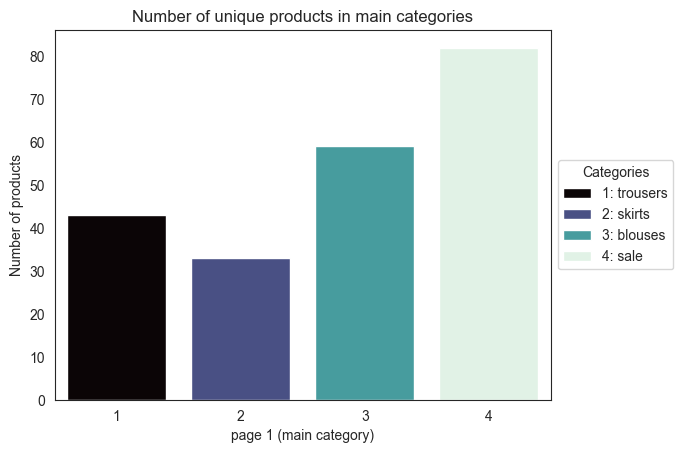

count
page 1 (main category)       
1                          43
2                          33
3                          59
4                          82

In [32]:
products_cat = pd.DataFrame(products['page 1 (main category)'].value_counts()).sort_values(by='page 1 (main category)')

sns.countplot(data=products, x='page 1 (main category)', hue ='page 1 (main category)', palette = 'mako')
plt.title('Number of unique products in main categories')
plt.ylabel('Number of products')
plt.legend(labels = ['1: trousers', '2: skirts', '3: blouses', '4: sale'], loc='center left', bbox_to_anchor=(1, 0.5), title='Categories')
plt.show()

products_cat

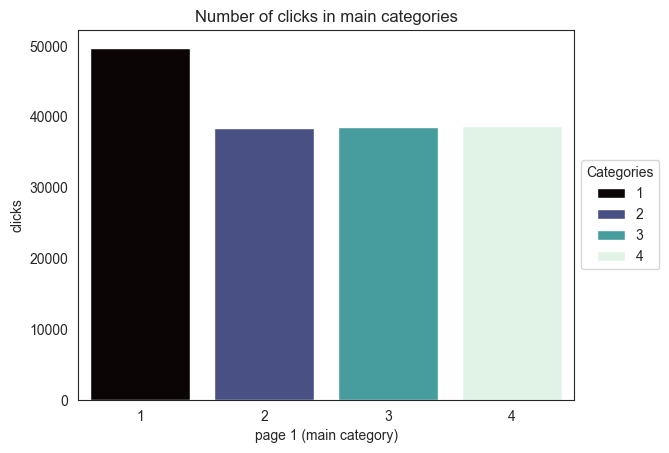

clicks
page 1 (main category)        
1                        49743
2                        38407
3                        38577
4                        38747

In [33]:
category_sessions = pd.DataFrame(products.groupby('page 1 (main category)')['clicks'].sum())

sns.barplot(category_sessions, x='page 1 (main category)', y='clicks', hue = 'page 1 (main category)', palette = 'mako')
plt.title('Number of clicks in main categories')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Categories')
plt.show()

category_sessions


Некоторые выводы из данных графиков:
Распределение числа продуктов\числа кликов по категориям очень неравномерно

категория 1('Trousers') при значительно большем количестве кликов включает в себя число продуктов (43шт), гораздо меньшее, чем в категориях 3(59), 4(82). Продукты этой категории гораздо популярнее, в сравнении с категорией 4

Категория 4 ('Sale') с самым большим количеством продуктов, почти в 2 раза больше категории 1, получает на ~22% меньше кликов

## 1.5. Анализ по цветам. Признак COLOR

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white


Построим графики того, сколько кликов сделано по каждому цвету, и сколько продуктов каждого цвета есть на сайте

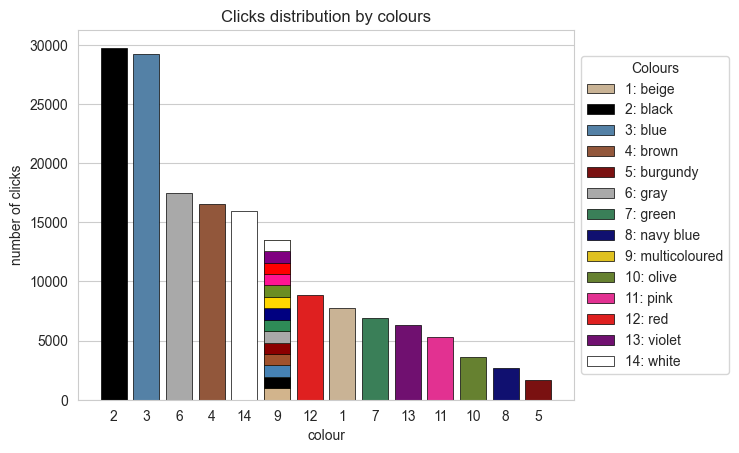

colour
2     29764
3     29259
6     17476
4     16517
14    15939
9     13531
12     8830
1      7785
7      6876
13     6295
11     5292
10     3579
8      2664
5      1667
Name: count, dtype: int64

In [34]:
color_clicks_counts = df['colour'].value_counts()


# кажется этим типом графиков я горжусь больше всего в этом проекте (с точки зрения визуализации)
sns.set_style('whitegrid')
#basic color set 
# colors = ['beige','black','blue','brown', 'darkred',
#           'gray','green', 'navy', 'orange','olive',
#         'pink','red','violet','white']
#orange/gold = for multicolor

#alternative color set
colors = ['tan','black','steelblue','sienna', 'darkred',
          'darkgray','seagreen', 'navy', 'gold','olivedrab',
            'deeppink','red','purple','white']
colors_name = ['beige','black','blue','brown', 'burgundy',
               'gray','green', 'navy blue', 'multicoloured','olive',
               'pink','red','violet','white']
colors_name_index = [f"{i+1}: {colors_name[i]}" for i in range(len(colors_name))]


fig, ax = plt.subplots()
sns.countplot(data=df, x='colour', hue='colour', order = color_clicks_counts.keys(), palette = colors,edgecolor='black', linewidth=0.5)
#Мультицвет для цвета 9
bar = ax.patches[8]
bottom, segment_height = 0, bar.get_height() / len(colors)
for i, color in enumerate(colors):
    delta_x=bar.get_width()
    ax.bar(bar.get_x() +delta_x/2, segment_height , width=bar.get_width(), bottom=bottom, color=color, edgecolor='black', linewidth=0.4)
    bottom += segment_height

plt.title('Clicks distribution by colours')
ax.legend(labels = colors_name_index, loc='center left', bbox_to_anchor=(1, 0.5), title='Colours')
plt.ylabel('number of clicks')
plt.show()

color_clicks_counts

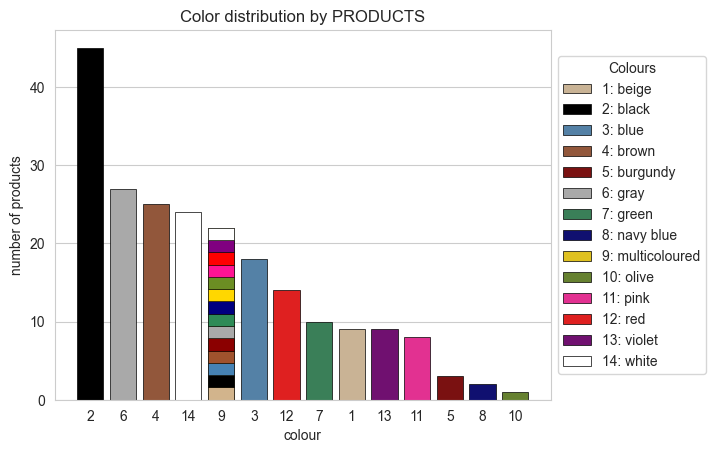

colour
2     45
6     27
4     25
14    24
9     22
3     18
12    14
7     10
1      9
13     9
11     8
5      3
8      2
10     1
Name: count, dtype: int64

In [35]:
color_products = products['colour'].value_counts()
sns.set_style('whitegrid')
#basic color set 
# colors = ['beige','black','blue','brown', 'darkred',
#           'gray','green', 'navy', 'orange','olive',
#         'pink','red','violet','white']
#orange/gold = for multicolor

#alternative color set
colors = ['tan','black','steelblue','sienna', 'darkred',
          'darkgray','seagreen', 'navy', 'gold','olivedrab',
            'deeppink','red','purple','white']

colors_name = ['beige','black','blue','brown', 'burgundy',
               'gray','green', 'navy blue', 'multicoloured','olive',
               'pink','red','violet','white']
colors_name_index = [f"{i+1}: {colors_name[i]}" for i in range(len(colors_name))]

fig, ax = plt.subplots()
sns.countplot(data=products, x='colour', hue='colour', order = color_products.keys(), palette = colors, edgecolor='black', linewidth=0.5)
#Мультицвет
bar = ax.patches[8]
bottom, segment_height = 0, bar.get_height() / len(colors)
for i, color in enumerate(colors):
    delta_x=bar.get_width()
    ax.bar(bar.get_x() +delta_x/2, segment_height , width=bar.get_width(), bottom=bottom, color=color, edgecolor='black', linewidth=0.4)
    bottom += segment_height

plt.title('Color distribution by PRODUCTS')
ax.legend(labels = colors_name_index, loc='center left', bbox_to_anchor=(1, 0.5), title='Colours')
plt.ylabel('number of products')
plt.show()

color_products

**Выводы:**

Сравнивая графики распределения кликов по цветам и количества продуктов по цветам, можно сделать некоторые выводы о продуктах магазина.

Максимальное количество кликов получает черный цвет, затем с небольшим отставанием синий. Однако по графику с цветом и количеством продуктов видно, что синих продуктов не так много. Следует рассмотреть возможность пересмотреть цветовые решения по продуктам (например, добавить больше синих моделей одежды в ассортимент, они привлекут внимание пользователей)

## 1.6. Анализ сайта. Признак Location. Структура сайта. Действия пользователя, клики по продуктам

#### 1.6.1. Введение про location

LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right


Исходя из предоставленных данных у нашего сайта есть вполне определенная структура

Есть главные страницы с категориями товаров (page 1 (main category), 4 штуки), есть page - внутренняя страница каждой категории, есть location - местоположение продукта на экране, разделенном на 6 частей, есть код для конечной модель продукта page 2 (clothing model)

In [36]:
location_matrix = np.array([[1,2,3], [4,5,6]])
print(location_matrix)

[[1 2 3]
 [4 5 6]]


Число кликов на каждую область location

In [37]:
#df['location'].value_counts()
location_clicks = pd.DataFrame(products.groupby(['location'])['clicks'].sum())
location_dict = location_clicks.to_dict()['clicks']
location_clicks
#location_dict

clicks
location        
1          34532
2          33383
3          21656
4          27377
5          27783
6          20743

Визуализация

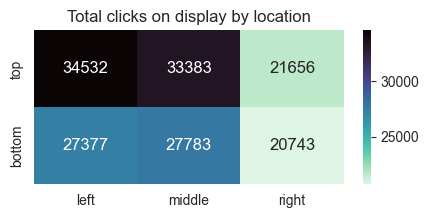

In [38]:
clicks = np.vectorize(location_dict.get)(location_matrix)

plt.figure(figsize=(5, 2))
ax = sns.heatmap(clicks, annot=True,fmt=".0f", cmap=sns.color_palette("mako", as_cmap=True).reversed(), annot_kws={'size': 12},
                xticklabels = ['left','middle', 'right'],
                yticklabels = ['top','bottom'])
plt.title('Total clicks on display by location')
plt.show()


На данной тепловой карте видно, что верхние левый и средний сектора привлекают самое большое число кликов. Затем по важности левый и средний нижние сектора, потом верхний правый. И последний, значительно отстающий от лидеров по кликам location, - правый нижний угол. Продуктам, расположенным там, достанется минимальное количество переходов

#### 1.6.2. Клики по каждой странице и location

А теперь построим такое же представление о кликах и визуализациях для каждой из страниц: (page 2 main category) категории и (page) страницы в категории

In [39]:
location_clicks_by_pages = pd.DataFrame(products.groupby(['page 1 (main category)','page','location'])['clicks'].sum())
location_clicks_by_pages = location_clicks_by_pages.reset_index()
location_clicks_by_pages

page 1 (main category)  page  location  clicks
0                        1     1         1    7210
1                        1     1         2    6678
2                        1     1         3    5130
3                        1     1         4    7079
4                        1     1         5    4992
..                     ...   ...       ...     ...
70                       4     4         6    1181
71                       4     5         1     655
72                       4     5         2    1017
73                       4     5         3     426
74                       4     5         4     725

[75 rows x 4 columns]

In [40]:
# #Для примера, категория 1 (page 1 main category), страница 3 (page)
# i_main_page = 1
# j_page = 3

# category_mask = (location_clicks_by_pages['page 1 (main category)'] == i_main_page)
# page_mask = (location_clicks_by_pages['page'] == j_page)
# df_tiny = pd.DataFrame(location_clicks_by_pages[category_mask & page_mask][['location', 'clicks']])
# df_tiny.index = df_tiny['location']
# df_tiny.drop(columns='location', inplace=True)
# df_tiny

In [41]:
# tiny_dict = {i:0 for i in range(1,7)}
# for j in df_tiny.index:
#     tiny_dict[j] = df_tiny.loc[j]['clicks']
# tiny_dict

In [42]:
# page_clicks = np.vectorize(tiny_dict.get)(location_matrix)

# plt.figure(figsize=(5, 3))
# ax = sns.heatmap(page_clicks, annot=True,fmt=".0f", cmap=sns.color_palette("mako", as_cmap=True).reversed(), annot_kws={'size': 12},
#                 xticklabels = ['left','middle', 'right'],
#                 yticklabels = ['top','bottom'])
# plt.title(f'Clicks on display by location; Main page {i_main_page}, page {j_page}')
# plt.show()
                

Еще немного про структуру сайта, сколько внутренних страниц есть для каждой страницы категории

In [43]:
pages_structure = pd.DataFrame(location_clicks_by_pages.groupby('page 1 (main category)')['page'].agg(lambda x: list(set(x))))
pages_structure

page
page 1 (main category)                 
1                             [1, 2, 3]
2                                [1, 2]
3                          [1, 2, 3, 4]
4                       [1, 2, 3, 4, 5]

Визуализация кликов постранично и по location

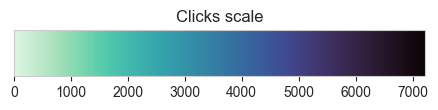

Page 1 (main category): 1
	Page: 1


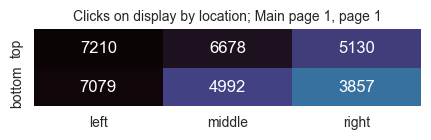

	Page: 2


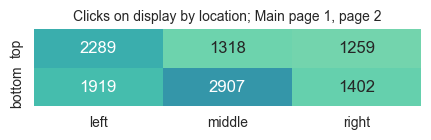

	Page: 3


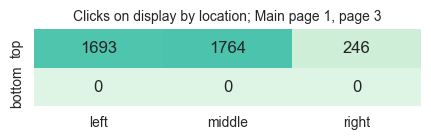


Page 1 (main category): 2
	Page: 1


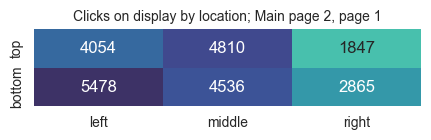

	Page: 2


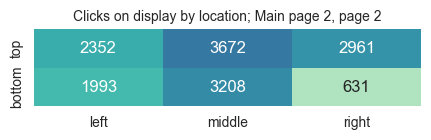


Page 1 (main category): 3
	Page: 1


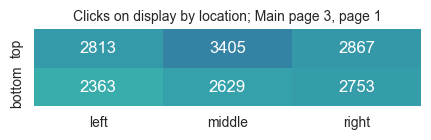

	Page: 2


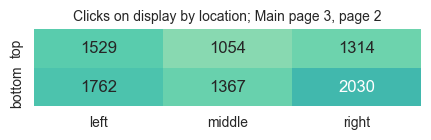

	Page: 3


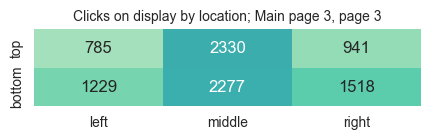

	Page: 4


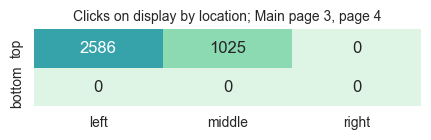


Page 1 (main category): 4
	Page: 1


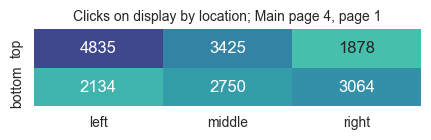

	Page: 2


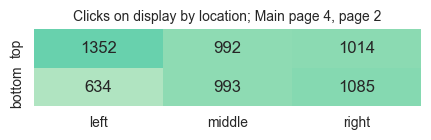

	Page: 3


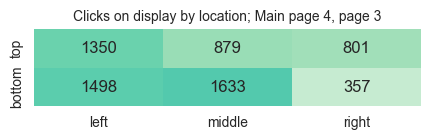

	Page: 4


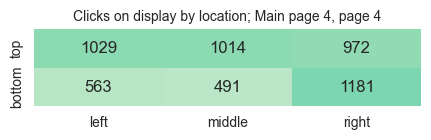

	Page: 5


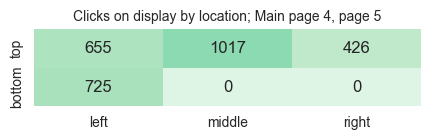

In [44]:
max_loc_pages_clicks = location_clicks_by_pages['clicks'].max()

import matplotlib.colors as mcolors
fig, ax = plt.subplots(figsize=(4.5, 1))
# vmin, vmax =  np.nanmin(A), np.nanmax(A)
cmap = plt.colormaps['mako'].reversed()
norm = mcolors.Normalize(0, max_loc_pages_clicks) 
cbar = fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax, orientation='horizontal')
plt.tight_layout()
plt.title('Clicks scale')
plt.show()



for i_main_page in pages_structure.index:
    print('Page 1 (main category):',i_main_page)
    category_mask = (location_clicks_by_pages['page 1 (main category)'] == i_main_page)
    
    for j_page in pages_structure.loc[i_main_page]['page']:
        print('\tPage:',j_page)
        page_mask = (location_clicks_by_pages['page'] == j_page)

        df_tiny = pd.DataFrame(location_clicks_by_pages[category_mask & page_mask][['location', 'clicks']])
        df_tiny.index = df_tiny['location']
        
        tiny_dict = {i:0 for i in range(1,7)}
        for j in df_tiny.index:
            tiny_dict[j] = df_tiny.loc[j]['clicks']


        page_clicks = np.vectorize(tiny_dict.get)(location_matrix)
        plt.figure(figsize=(5, 1))
        ax = sns.heatmap(page_clicks, annot=True,fmt=".0f", cmap=sns.color_palette("mako", as_cmap=True).reversed(), annot_kws={'size': 12},
                         vmin = 0, vmax = max_loc_pages_clicks,
                        xticklabels = ['left','middle', 'right'],
                        yticklabels = ['top','bottom'],
                        cbar=False)
        plt.title(f'Clicks on display by location; Main page {i_main_page}, page {j_page}', fontsize=10)
        plt.show()
    print()



С помощью построенных выше тепловых карт можно увидеть, что очевидно бОльшее число кликов приходится на левый верхний угол первой страницы. Но видно, что есть такие страницы и категории, где внимание пользователя будет сфокусировано на других location, видимо по причине особой привлекательности расположенных там продуктов

#### 1.6.3. Главное: Клики по всем продуктам по каждой из страниц с учетом местоположения

In [45]:
# i_main_page = 1
# j_page = 1
# main_page_mask = (products['page 1 (main category)'] == i_main_page)
# page_mask = (products['page'] == j_page)
# products[main_page_mask & page_mask].groupby('location')['model'].apply(list)

Мы начали визуализацию действий пользователя на сайте с числа кликов по местоположению на сайте, затем углубились на постраничный уровень, но есть еще конкретные модели, каждая из которых тоже где-то на сайте зафиксирована определенным образом (что подтверждается тем, как мы агрегировали таблицу products с продуктами). Так что углубимся и дальше

Строим таблицу, где для каждой страницы категории и внутренней страницы, для каждого местоположения на них, будет указано множество моделей и множество кликов, на них сделанное

In [46]:
models_locs = pd.DataFrame(products.groupby(['page 1 (main category)','page','location'])['model'].apply(list)).reset_index()
#models_locs

clicks_locs = pd.DataFrame(products.groupby(['page 1 (main category)','page','location'])['clicks'].apply(list)).reset_index()
#clicks_locs

df_display = models_locs.merge(clicks_locs)
df_display

page 1 (main category)  page  location            model  \
0                        1     1         1     [A1, A2, A3]   
1                        1     1         2     [A4, A5, A6]   
2                        1     1         3     [A7, A8, A9]   
3                        1     1         4  [A10, A11, A12]   
4                        1     1         5  [A13, A14, A15]   
..                     ...   ...       ...              ...   
70                       4     4         6  [P70, P71, P72]   
71                       4     5         1  [P73, P74, P75]   
72                       4     5         2  [P76, P77, P78]   
73                       4     5         3  [P79, P80, P81]   
74                       4     5         4            [P82]   

                clicks  
0   [2265, 3013, 1932]  
1   [2522, 2354, 1802]  
2   [1622, 1585, 1923]  
3   [2280, 2789, 2010]  
4    [1577, 926, 2489]  
..                 ...  
70     [551, 242, 388]  
71     [216, 270, 169]  
72     [171, 445, 401]  
73       [2, 222, 202]  
74               [725]  

[75 rows x 5 columns]

Визуализируем! (все визуализации приведены к общей шкале интенсивности кликов, приведенной в начале) 

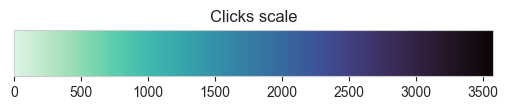

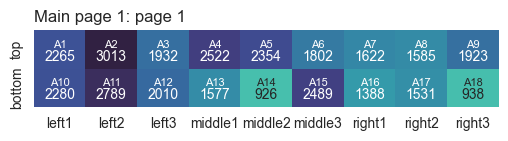

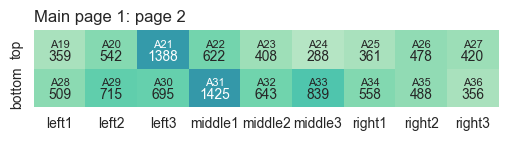

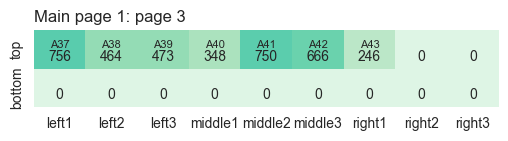

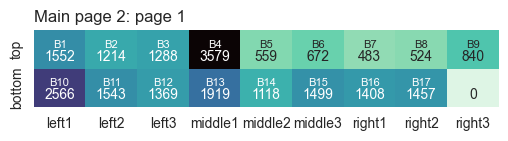

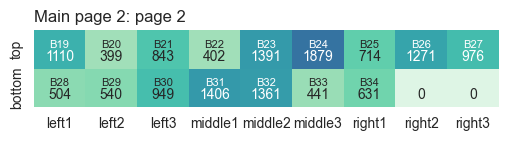

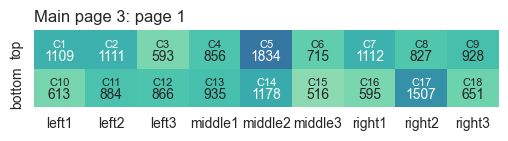

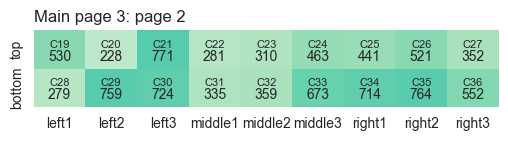

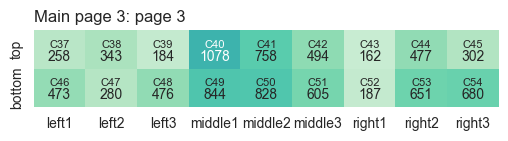

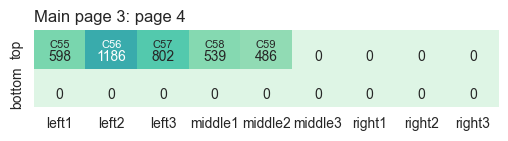

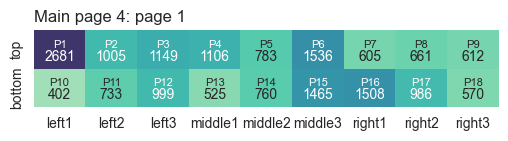

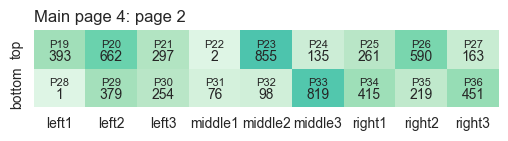

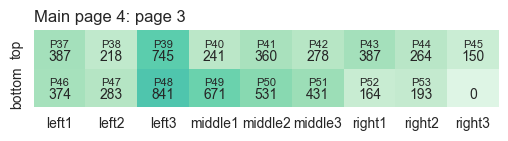

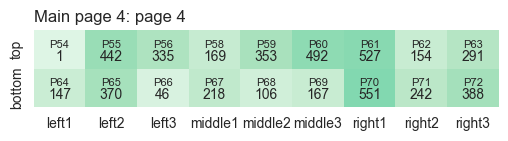

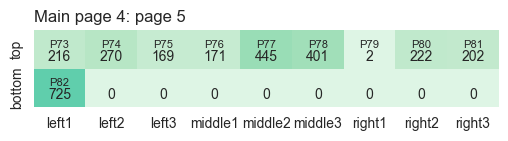

In [47]:
max_clicks = products['clicks'].max()
fig, ax = plt.subplots(figsize=(5.2, 1))
# vmin, vmax =  np.nanmin(A), np.nanmax(A)
cmap = plt.colormaps['mako'].reversed()
norm = mcolors.Normalize(0, max_clicks) 
cbar = fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax, orientation='horizontal')
plt.tight_layout()
plt.title('Clicks scale')
plt.show()


for i_main_page in pages_structure.index:
    #print('Page 1 (main category):',i_main_page)
    main_page_mask = (df_display['page 1 (main category)'] == i_main_page)
    
    for j_page in pages_structure.loc[i_main_page]['page']:
        #print('\tPage:',j_page)
        page_mask = (df_display['page'] == j_page)

        temp_display = df_display[main_page_mask & page_mask][['location', 'model', 'clicks']]
        temp_display.index = temp_display['location']
        temp_display.drop(columns =['location'], inplace=True)

        values_display = np.zeros([2,9], dtype='int')
        labels_display = np.full([2, 9], "  ", dtype='object')
        
        for row in range(2):
            for i in range(3):
                if 3*row +i+1 in temp_display.index:
                    new_labels = temp_display.loc[i+1+row*3]['model']
                    labels_display[row][i*3:i*3+len(new_labels)] = new_labels
            
                    new_values = temp_display.loc[i+1+row*3]['clicks']
                    values_display[row][i*3:i*3+len(new_values)] = new_values
        
        # print(labels_display)
        # print(values_display)
        
        values_display = pd.DataFrame(values_display, index =['top','bottom'], columns = ['left1','left2','left3', 'middle1', 'middle2', 'middle3', 'right1', 'right2', 'right3'])
        
        plt.figure(figsize=(6, 1))
        ax = sns.heatmap(values_display, annot=True, vmin=0, vmax = max_clicks, annot_kws={'va':'top','size':10}, fmt=".0f" , cmap=sns.color_palette("mako", as_cmap=True).reversed(), cbar=False,)
        sns.heatmap(values_display, annot=labels_display, vmin=0, vmax = max_clicks, annot_kws={'va':'bottom', 'size':8}, fmt="" , cbar=False, cmap=sns.color_palette("mako", as_cmap=True).reversed())
        plt.title(f'Main page {i_main_page}: page {j_page}', loc='left')
        plt.show()
    print()
                

**Выводы**:

Это самое подробное представление по кликам, где можно наблюдать какие именно модели находились в разных location, и какое количество кликов получила каждая из них. 

Пожалуй, это наиболее полный ответ на вопрос, какие действия пользователи совершают на сайте, а именно, на какие страницы\местоположения и как интенсивно кликают пользователи, какие самые частые взаимодействия.

Исходя из этих данных, особенно с учетом небольшого количества продуктов, грамотный маркетолог мог бы предложить, например, сделать перестановки моделей, так чтобы самые рентабельные точно получили бОльшее количество кликов за счет расположения на странице и номера страницы и т.д. или продумать, как оптимизировать расположение на сайте (например, перестроить структуру location и page_structure)

В данных тепловых картах есть некоторое допущение о расположении моделей в секторах (location). Почти для всех секторов количество попавших туда моделей =3 (не считая тех, которые моделями из-за конечного по порядку расположения на страницах). Для построения карт выше выбрано горизонтальное (строковое) расположение моделей в секторе, т. е. [A1, A2, A3], хотя конечно, это мог быть вектор столбец [[A1], [A2], [A3]] и тогда каждый из построенных секторов должен был быть транспонирован. Но это допущение не влияет на распределение кликов по моделям, только на общий вид (и некоторую визуальную пропорцию) представления

## 1.7. Анализ по странам. Признак COUNTRY

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)


In [48]:
country_dict = {1: 'Australia', 2: 'Austria', 3: 'Belgium', 4: 'British Virgin Islands', 5: 'Cayman Islands', 6: 'Christmas Island', 
                7: 'Croatia', 8: 'Cyprus', 9: 'Czech Republic', 10: 'Denmark', 11: 'Estonia', 12: 'unidentified', 13: 'Faroe Islands', 
                14: 'Finland', 15: 'France', 16: 'Germany', 17: 'Greece', 18: 'Hungary', 19: 'Iceland', 20: 'India', 
                21: 'Ireland', 22: 'Italy', 23: 'Latvia', 24: 'Lithuania', 25: 'Luxembourg', 26: 'Mexico', 27: 'Netherlands', 
                28: 'Norway', 29: 'Poland', 30: 'Portugal', 31: 'Romania', 32: 'Russia', 33: 'San Marino', 34: 'Slovakia', 
                35: 'Slovenia', 36: 'Spain', 37: 'Sweden', 38: 'Switzerland', 39: 'Ukraine', 40: 'United Arab Emirates', 41: 'United Kingdom', 
                42: 'USA', 43: 'biz (*.biz)', 44: 'com (*.com)', 45: 'int (*.int)', 46: 'net (*.net)', 47: 'org (*.org)'}

Чтобы проследить детали поведения пользователей из разных стран, агрегируем данные по странам (посчитаем общее количество кликов, сессий, сумму цен для каждой страны и потом сделаем новые признаки: среднее количество кликов на сессию, средняя сумма продуктов на сессию, средняя цена продукта на клик)

In [49]:
df_country = pd.DataFrame(df.groupby('country').agg(
    clicks=('order', 'count'),
    sessions = ('session ID', 'nunique'),
    price_sum = ('price', 'sum')
))

df_country['mean_clicks_per_session'] = df_country['clicks']/df_country['sessions']
df_country['mean_price_sum_per_session'] = df_country['price_sum']/df_country['sessions']
df_country['mean_price_per_click'] = df_country['price_sum']/df_country['clicks']
df_country['country_name'] = df_country.index.map(country_dict)

df_country.head()

clicks  sessions  price_sum  mean_clicks_per_session  \
country                                                         
1             3         1        104                 3.000000   
2            58        11       2460                 5.272727   
3           256        20      10330                12.800000   
4             1         1         38                 1.000000   
5             4         1        166                 4.000000   

         mean_price_sum_per_session  mean_price_per_click  \
country                                                     
1                        104.000000             34.666667   
2                        223.636364             42.413793   
3                        516.500000             40.351562   
4                         38.000000             38.000000   
5                        166.000000             41.500000   

                   country_name  
country                          
1                     Australia  
2                       Austria  
3                       Belgium  
4        British Virgin Islands  
5                Cayman Islands

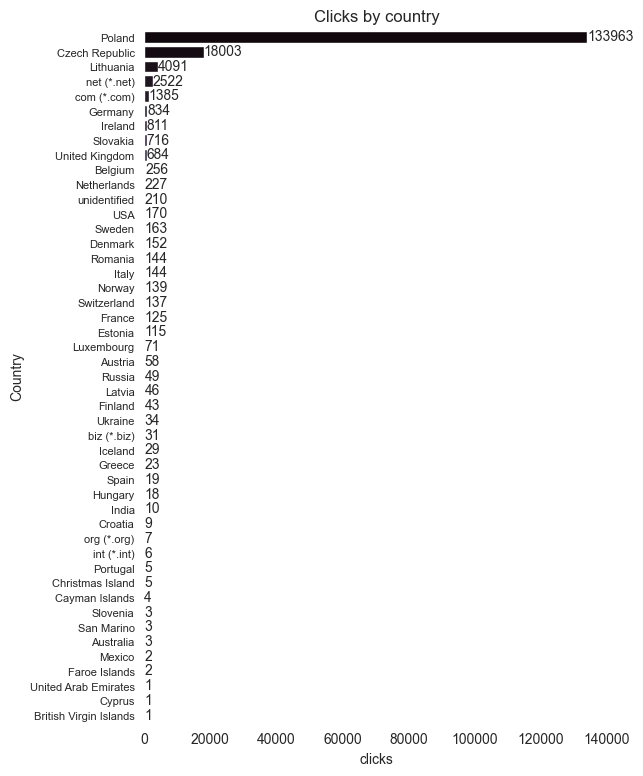

In [50]:
df_country_clicks = df_country[['country_name', 'clicks']].sort_values(by='clicks', ascending = False)

plt.figure(figsize=(6, 9))
ax = sns.barplot(data=df_country_clicks, y='country_name', x= 'clicks', hue='country_name', palette = 'mako')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + 0.65))
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.ylabel('Country', fontsize=10)  
plt.yticks(fontsize=8)
plt.title('Clicks by country')
plt.show()

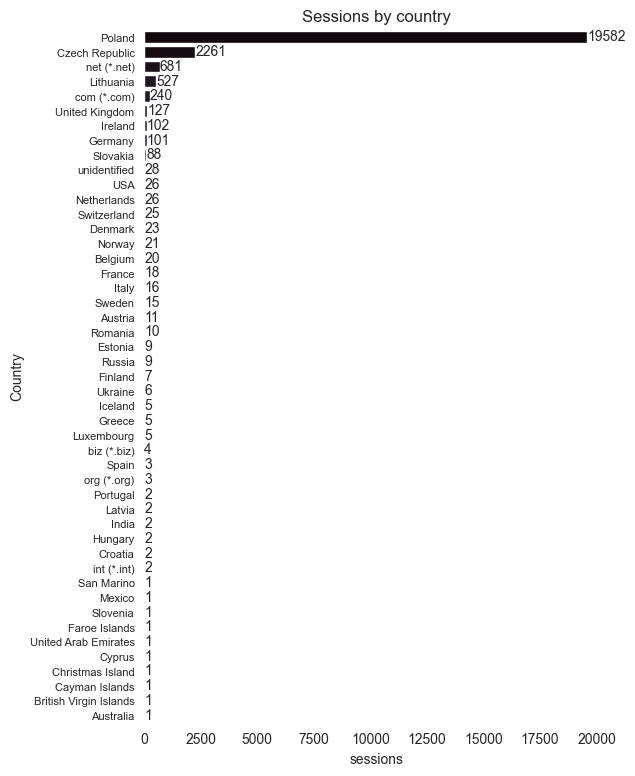

In [51]:
df_country_sessions = df_country[['country_name', 'sessions']].sort_values(by='sessions', ascending = False)


plt.figure(figsize=(6, 9))
ax = sns.barplot(data=df_country_sessions, y='country_name', x= 'sessions', hue='country_name', palette='mako')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + 0.65))

plt.ylabel('Country', fontsize=10)  
plt.yticks(fontsize=8)
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.title('Sessions by country')
plt.show()

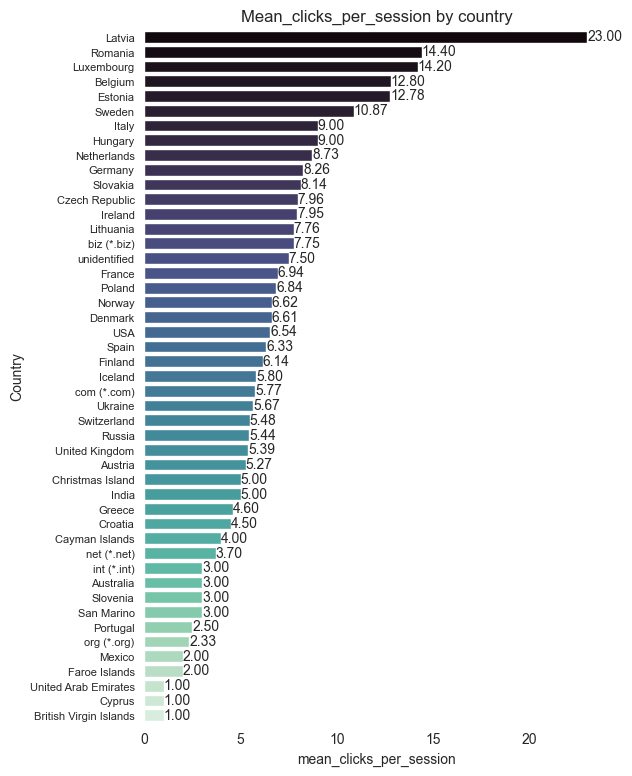

In [52]:
df_country_mean_clicks = df_country[['country_name', 'mean_clicks_per_session']].sort_values(by='mean_clicks_per_session', ascending = False)

plt.figure(figsize=(6, 9))
ax = sns.barplot(data=df_country_mean_clicks, y='country_name', x= 'mean_clicks_per_session', hue='country_name', palette='mako')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + 0.65))

plt.ylabel('Country', fontsize=10)  
plt.yticks(fontsize=8)
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.title('Mean_clicks_per_session by country')
plt.show()

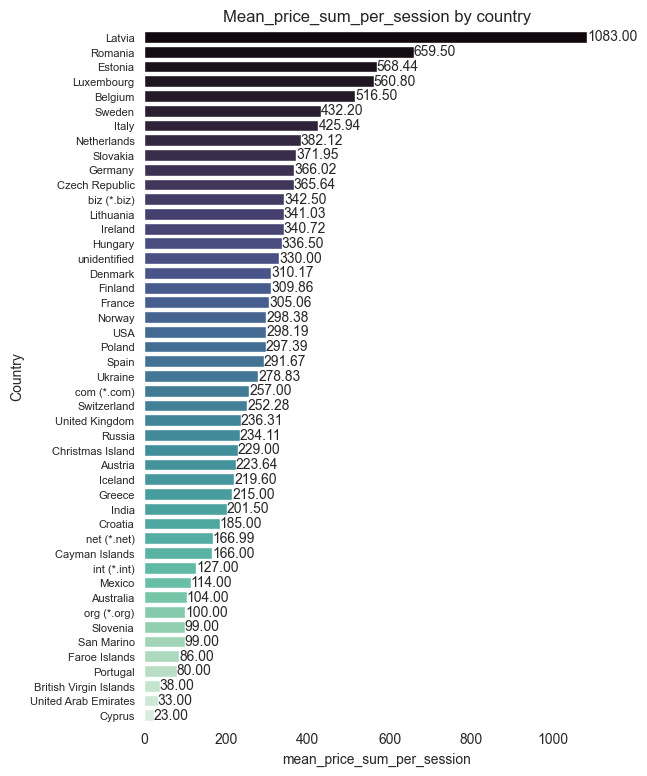

In [53]:
df_country_mean_price = df_country[['country_name', 'mean_price_sum_per_session']].sort_values(by='mean_price_sum_per_session', ascending = False)

plt.figure(figsize=(6, 9))
ax = sns.barplot(data=df_country_mean_price, y='country_name', x= 'mean_price_sum_per_session', hue='country_name', palette='mako')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + 0.65))

plt.ylabel('Country', fontsize=10)  
plt.yticks(fontsize=8)
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.title('Mean_price_sum_per_session by country')
plt.show()

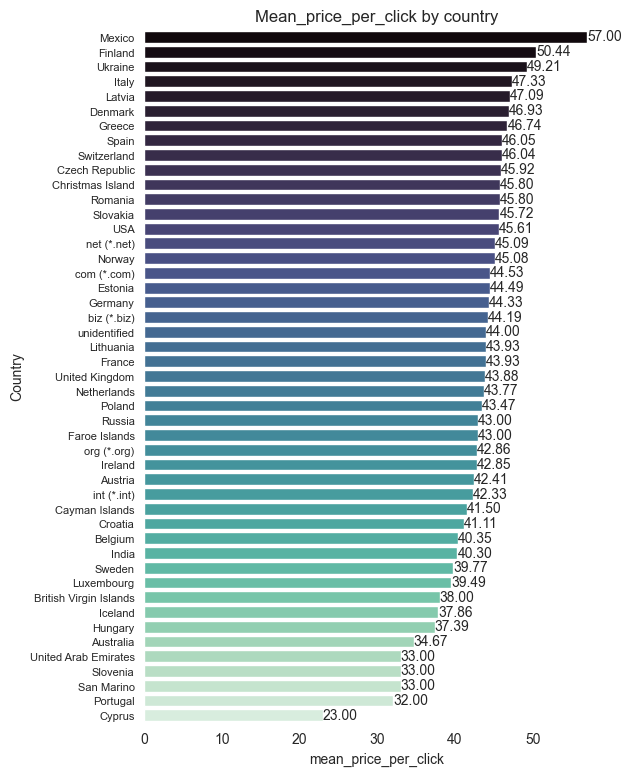

In [54]:

df_country_mean_price_per_click = df_country[['country_name', 'mean_price_per_click']].sort_values(by='mean_price_per_click', ascending = False)

plt.figure(figsize=(6, 9))
ax = sns.barplot(data=df_country_mean_price_per_click, y='country_name', x= 'mean_price_per_click', hue='country_name', palette='mako')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + 0.65))

plt.ylabel('Country', fontsize=10)  
plt.yticks(fontsize=8)
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.title('Mean_price_per_click by country')
plt.show()

**Выводы:**

Исходя из графиков данного раздела:
1. Самое большое количество сессий и общее количество кликов - Польша. Значительно (на порядок) превосходит другие страны. На втором месте - пользователи из Чехии. На третьем Литва и домен (*net)

2. Однако пользователи из этих трех стран (Польша, Чехия, Литва) совсем не входят в топ стран с самыми "долгими" сессиями (о долготе сессии мы судим по количеству кликов). Чехия 7.96 кликов/сессию, Литва 7.76, Польша 6.84.
Тем временем страны-лидеры по среднему количеству числа кликов на сессию это Латвия (23 клика/), Румыния (14.40), Люксембург (14.20)
Если бы у нас только были данные о фактических покупках, и можно было бы подтвердить гипотезу, что сессии из большего числа кликов приводят к большему числу покупок, то надо было бы утвердиться в мысли, что надо как-то улучшать пользовательский опыт стран лидеров по кликам, чтобы их сессии тоже становились длиннее и продуктивнее для фактических продаж
Похожая ситуация и с средней суммой цен просмотренного за сессию, Латвия топ-страна, по сессиям из которой пользователь просматривает товаров на наибольшую сумму (1083 у.е.), в то время как польские сессии, самые многочисленные, по общей сумме цен просмотренного достигают среднего числа в 297

3. В лидерах по показателю самой дорогой цены товара/клик неожиданно выигрывает Мексика, что не очень показательно, так как общее количество сессий было равно =1, кликов = 2 (кто-то из Мексики случайно зашел и посмотрел на дорогой товар)
Тем не менее дальше в топе: Финляндия, Украина, Италия, Латвия, их польхователи смотрят товары по средней цене 50 - 47 у.е., в то время как для польских кликов средняя цена товара всего 43.77

Данные соображения и "рейтинги" стран могут быть использованы для решения о проведении дополнительных рекламных компаниях и акций по доставке в странах, где потенциально много покупателей, готовых проводить длинные сессии на сайте с большой суммарной ценой просмотренных товаров (Латвия), что потенциально приведет к развитию новых рынков стран для наших продуктов

# 2. Модели прогнозирования временных рядов

## 2.1. Создание и визуализация

Как уже было сказано во введении пункта 1.2. в данных нет очевидного признака, который может быть рассмотрен в качестве целевой переменной для построения моделей машинного обучения.

Однако, у нас есть данные по дням, и мы можем сгруппировать для каждого дня данные по количеству кликов и по количеству сессий на сайте, таким образом получив временные ряды.

In [55]:
print('Интервал, в который попадают даты в наших данных:',df['date'].min(),'-', df['date'].max())
print(f'Всего {df['date'].nunique()} дней')

Интервал, в который попадают даты в наших данных: 2008-04-01 00:00:00 - 2008-08-13 00:00:00
Всего 135 дней


Получим обобщенные данные для каждого дня: число уникальных сессий, число кликов:

In [56]:
df_daily = pd.DataFrame(df.groupby(['date', 'weekend', 'weekday'], as_index=False)[['session ID','order']].agg(
    total_sessions = ('session ID', 'nunique'),
    total_clicks = ('order', 'count')
)).set_index('date')

df_daily

weekend  weekday  total_sessions  total_clicks
date                                                      
2008-04-01        0        1             477          3181
2008-04-02        0        2             480          3456
2008-04-03        0        3             276          1854
2008-04-04        0        4             266          1801
2008-04-05        1        5             199          1504
...             ...      ...             ...           ...
2008-08-09        1        5             136          1056
2008-08-10        1        6             128           929
2008-08-11        0        0             178          1240
2008-08-12        0        1             187          1374
2008-08-13        0        2              21           200

[135 rows x 4 columns]

Построим гистограммы распределений для количества сессий и количества кликов ( с учётом того, является день выходным или нет)

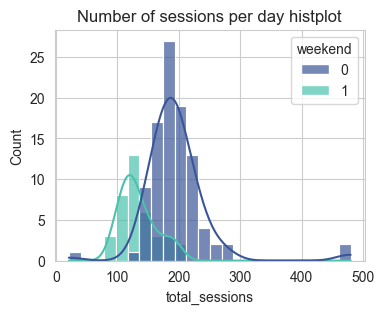

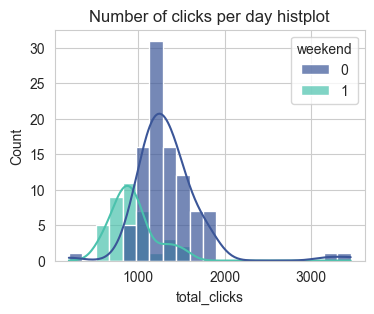

In [57]:
# plt.figure(figsize=(4,3))
# sns.histplot(df_daily['total_sessions'], color = palette_color[2], alpha=0.7,legend=False, binwidth=16, kde=True)
# plt.title('Number of sessions per day histplot')
# plt.show()
# print()
plt.figure(figsize=(4,3))
sns.histplot(data=df_daily, x='total_sessions', alpha=0.7, hue='weekend', palette = [palette_color[2],palette_color[5]], kde=True)
plt.title('Number of sessions per day histplot')
plt.show()

plt.figure(figsize=(4,3))
sns.histplot(data = df_daily, x='total_clicks', hue='weekend', palette = [palette_color[2],palette_color[5]], alpha=0.7,legend=True, kde=True)
plt.title('Number of clicks per day histplot')
plt.show()

Данные гистограммы (распределение кликов и распределение числа сессий) выглядят как нормально распределение с двумя центрами, для выходных и будних дней

Построим визуализацию по дням для наших данных (сделаем дополнительные отметки-точки для выходных дней и для самых тяжелых дней недели - понедельников):

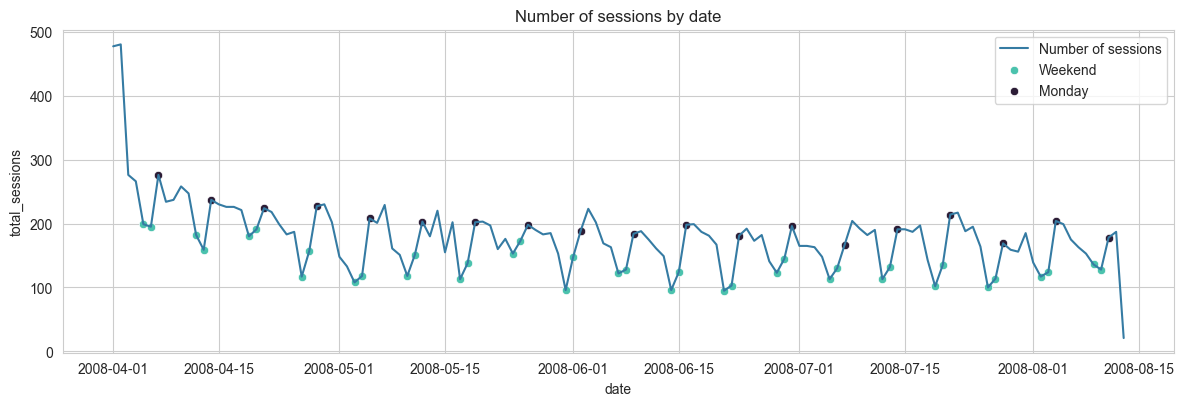

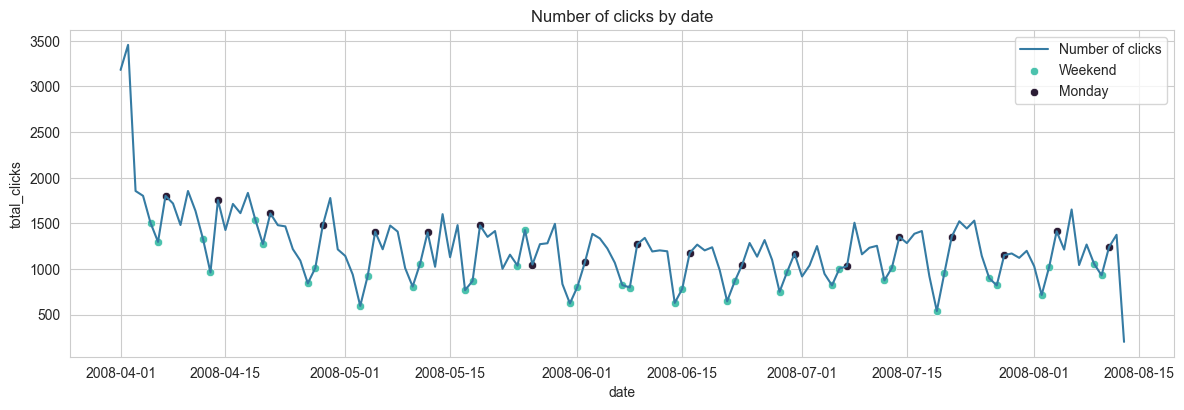

In [58]:
series_names = ['total_sessions', 'total_clicks']

weekend_points =df_daily[df_daily['weekend']==1]
monday_points = df_daily[df_daily['weekday']==0]

for column in series_names:
    plt.figure(figsize=(12,4))
    ax = sns.lineplot(data=df_daily, x=df_daily.index, y = column, color=palette_color[3], label='Number of '+column.split('_')[1])    
    sns.scatterplot(data=weekend_points, x= weekend_points.index, y=column, color=palette_color[5], ax=ax, label='Weekend')
    sns.scatterplot(data=monday_points, x=monday_points.index, y= column, color=palette_color[0], ax=ax, label='Monday')
    plt.tight_layout()
    plt.title(f'Number of {column.split('_')[1]} by date')
    plt.show()
    print()
    

Очевидно, что первые два дня значительно превосходят по числу кликов и уникальных сессий данные по другим дням. Может быть как раз 1, 2 апреля был запущен сайт, или была проведеная какая-то маркетинговая компания. Но в дальнейшем мы видим колебания с сезонностью похожей на недельную (судя по локальным минимумам в выходные, локальным максимумам количества сессий в понедельники.

Заметим также, что последний день включает всего 21 сессию и 200 кликов. Вероятно данные были выгружены не за полный последний день (2008-08-13), а включали только часть этого дня. Поэтому для построения модели временных рядов скорее всего придется не будем учитывать данные последнего дня нашего интервала (иначе получится не очень достоверная модель)

### 2.2. Тест Дикки Фуллера. Стационарность временных рядов

Проведем тест Дикки-Фуллера (ADF) для total_sessions и total_clicks, чтобы проверить ряды на стационарность

1. для всех данных 
2. для данных без последнего дня

In [59]:
for column in series_names:
    print('Тест Дикки-Фуллера для',column)
    series = df_daily[column]
    adf_result = adfuller(series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    print(f'ADF Statistic: {adf_statistic:.5f}')
    print(f'p-value: {p_value:.5f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value:.5f}')
    for key, value in critical_values.items():
        if adf_statistic < value:
            print(f'Ряд {column} стационарен на уровне значимости {key}.')
            break
    else:
        print(f'Ряд {'column'} не стационарен на всех уровнях значимости.')
    print()

Тест Дикки-Фуллера для total_sessions
ADF Statistic: -2.65437
p-value: 0.08227
Critical Values:
   1%: -3.48292
   5%: -2.88458
   10%: -2.57906
Ряд total_sessions стационарен на уровне значимости 10%.

Тест Дикки-Фуллера для total_clicks
ADF Statistic: -3.27339
p-value: 0.01611
Critical Values:
   1%: -3.48559
   5%: -2.88574
   10%: -2.57968
Ряд total_clicks стационарен на уровне значимости 5%.



In [60]:
for column in series_names:
    print('Тест Дикки-Фуллера для',column,' БЕЗ последнего дня наших данных')
    series = df_daily[:-1][column]
    adf_result = adfuller(series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    print(f'ADF Statistic: {adf_statistic:.5f}')
    print(f'p-value: {p_value:.5f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value:.5f}')
    for key, value in critical_values.items():
        if adf_statistic < value:
            print(f'Ряд {column} стационарен на уровне значимости {key}.')
            break
    else:
        print(f'Ряд {'column'}не стационарен на всех уровнях значимости.')
    print()

Тест Дикки-Фуллера для total_sessions  БЕЗ последнего дня наших данных
ADF Statistic: -4.18649
p-value: 0.00069
Critical Values:
   1%: -3.48606
   5%: -2.88594
   10%: -2.57979
Ряд total_sessions стационарен на уровне значимости 1%.

Тест Дикки-Фуллера для total_clicks  БЕЗ последнего дня наших данных
ADF Statistic: -4.77619
p-value: 0.00006
Critical Values:
   1%: -3.48292
   5%: -2.88458
   10%: -2.57906
Ряд total_clicks стационарен на уровне значимости 1%.



**Вывод**:

Да, ограничение наших данных (исключением последнего дня) делает наши временные ряды стационарными на гораздо большем уровне значимости, а значит для построения модели мы именно так и поступим


### 2.3. Прогнозирование временных рядов. Модели SARIMAX и auto arima

Разделение данных на train/test (последовательно, так как временной ряд)

In [61]:
print('Всего дней (без учета последнего):', df_daily[:-1].shape[0])

train_size = int(df_daily.shape[0] * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:-2]
print(f"Данные разделены на train/test размерами: {train.shape[0]}/{test.shape[0]}")

Всего дней (без учета последнего): 134
Данные разделены на train/test размерами: 108/25


Построим модель SARIMAX и будем использовать в качестве экзогенных параметров номер дня недели и булевский признак выходного дня (это хорошая идея, потому что в будущем, для прогнозирования будущих дней, такие параметры, как день недели и выходной мы всегда сможем для них посчитать). Сделаем предсказания для тестовой части данных, визуализируем и оценим предсказания по метрикам качества (MAE, RMSE, R2)

Модель SARIMAX для total_sessions:


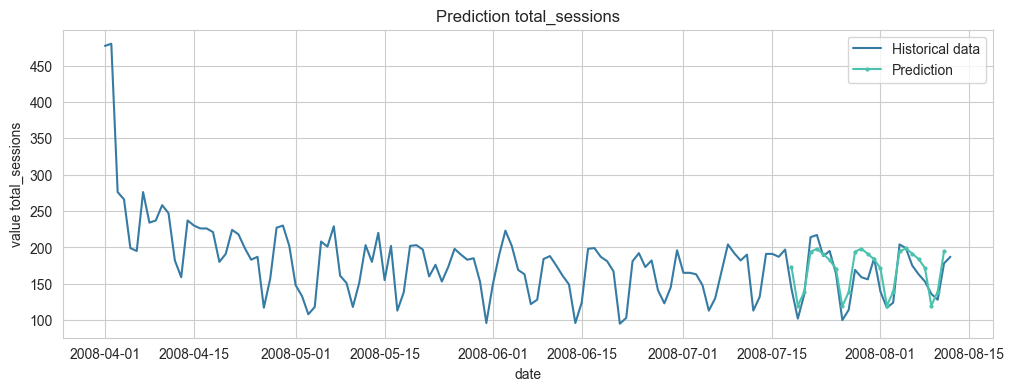

Метрики качества:
MAE: 16.6651
RMSE: 19.6530
R2: 0.6562

Модель SARIMAX для total_clicks:


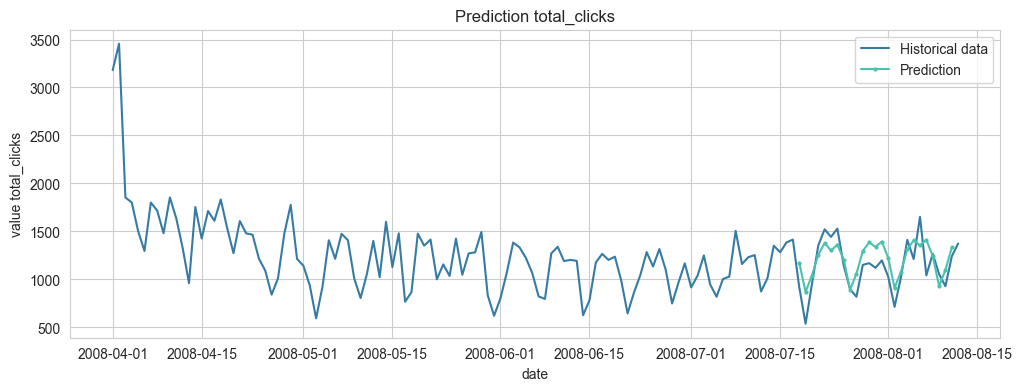

Метрики качества:
MAE: 164.9997
RMSE: 187.7196
R2: 0.4762



In [62]:
exog_train = train[['weekday', 'weekend']]
exog_test = test[['weekday', 'weekend']]


for column in series_names: # для total_sessions и total_clicks
    print(f"Модель SARIMAX для {column}:")

    series_train = train[column]
    series_train = series_train.asfreq('D')
    
    model = SARIMAX(series_train, 
                    order=(1,1,1), 
                    seasonal_order=(1,1,1,7), 
                    exog=exog_train, 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    model_fit = model.fit()
    #print(model_fit.summary())

    n_steps = test.shape[0]
    forecast = model_fit.forecast(steps=n_steps, exog = exog_test)
    forecast_index = test.index

    plt.figure(figsize=(12, 4))
    plt.plot(df_daily[:-1].index, df_daily[:-1][column], color = palette_color[3],label='Historical data')
    plt.plot(forecast_index, forecast, label='Prediction', color = palette_color[5], marker='o', markersize=2)
    plt.title(f'Prediction {column}')
    plt.xlabel('date')
    plt.ylabel(f'value {column}')
    plt.legend()
    plt.show()

    print('Метрики качества:')
    mae = mean_absolute_error(test[column], forecast)
    rmse = np.sqrt(mean_squared_error(test[column], forecast))
    r2 = r2_score(test[column], forecast)
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2: {r2:.4f}',end='\n\n')

Другой подход пострения модели и подбора коэффициентов через auto-arima

Модель для total_sessions
Лучшие параметры найденные auto-arima (p, d, q): (0, 1, 1); (P, D, Q, m): (1, 0, 1, 7)


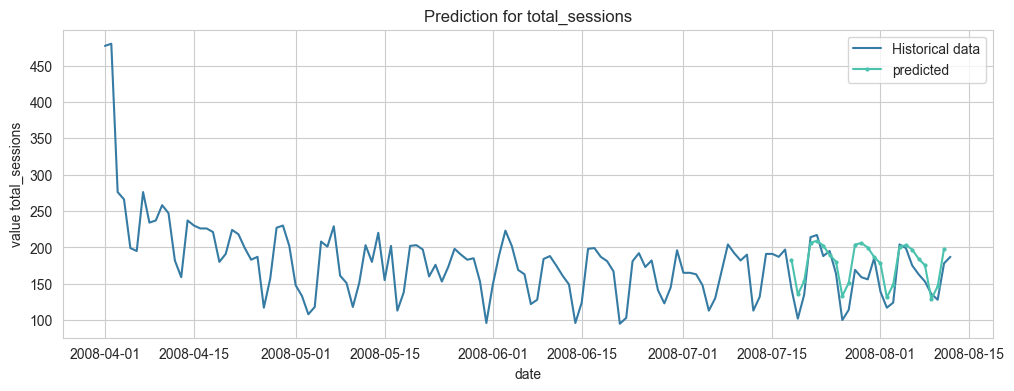

Метрики качества:
MAE: 21.5094
RMSE: 25.3665
R2: 0.4272

Модель для total_clicks
Лучшие параметры найденные auto-arima (p, d, q): (0, 1, 1); (P, D, Q, m): (1, 0, 1, 7)


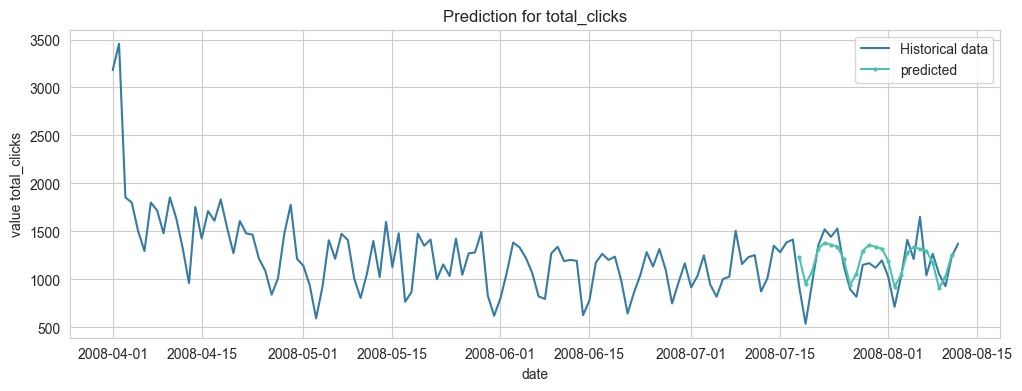

Метрики качества:
MAE: 157.2563
RMSE: 185.2903
R2: 0.4897



In [63]:

for column in series_names:
    print('Модель для',column)

    series_train = train[column]
    series_train = series_train.asfreq('D')

    model = auto_arima(series_train, 
                       seasonal=True,
                       exogenous = exog_train,
                       m=7, 
                       stepwise=True, 
                       trace=False)
    model_fit = model.fit(series_train)

    print(f"Лучшие параметры найденные auto-arima (p, d, q): {model_fit.order}; (P, D, Q, m): {model_fit.seasonal_order}")
    #print(model_fit.summary())
    n_steps = test.shape[0]
    forecast, conf_int = model_fit.predict(n_periods=n_steps, exogenous = exog_test, return_conf_int=True)
    forecast_index = test.index
    plt.figure(figsize=(12, 4))
    plt.plot(df_daily[:-1].index, df_daily[:-1][column], color = palette_color[3],label='Historical data')
    plt.plot(forecast_index, forecast, label='predicted', color = palette_color[5], marker='o', markersize=2)
    #plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color = palette_color[5], alpha=0.1)
    plt.title(f'Prediction for {column}')
    plt.xlabel('date')
    plt.ylabel(f'value {column}')
    plt.legend()
    plt.show()

    print('Метрики качества:')
    mae = mean_absolute_error(test[column], forecast)
    rmse = np.sqrt(mean_squared_error(test[column], forecast))
    r2 = r2_score(test[column], forecast)
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2: {r2:.4f}',end='\n\n')



**Вывод**

Интересно, что для модель SARIMAX (1,1,1,1,1,1,7) для total_sessions стала на тестовых данных лучше, чем модель с коэффициентами, подобранными auto-arima,
но для total_clicks верно обратное

C учетом того, что данных изначально по дням не очень много, да и еще 20% было выделено на тестовую часть, вряд ли получившаяся модель будет идеально работать. Если собрать больше данных, то конечно можно построить модель, которая будет работать гораздо лучше!

Тем не менее у нас появился инструмент для прогнозирования кликов/числа сессий. Построим прогноз на следующие 3 недели

Прогнозирование для total_sessions
	Лучшие параметры найденные auto-arima (p, d, q): (2, 1, 2); (P, D, Q, m): (1, 0, 2, 7)


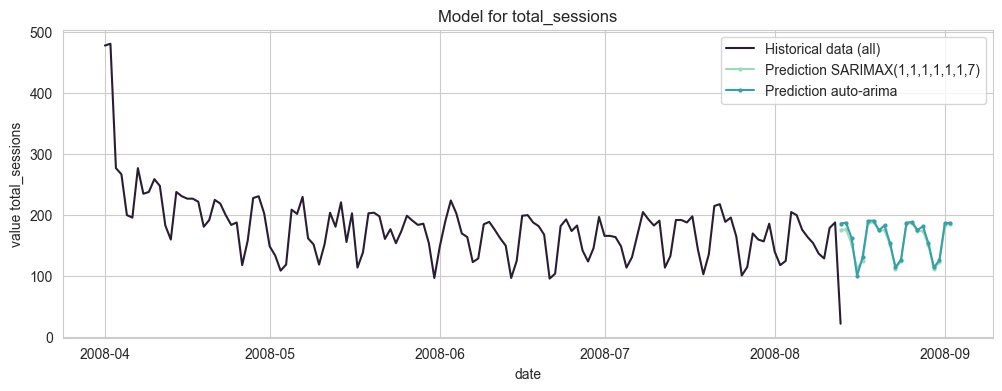


Прогнозирование для total_clicks
	Лучшие параметры найденные auto-arima (p, d, q): (1, 1, 0); (P, D, Q, m): (2, 0, 1, 7)


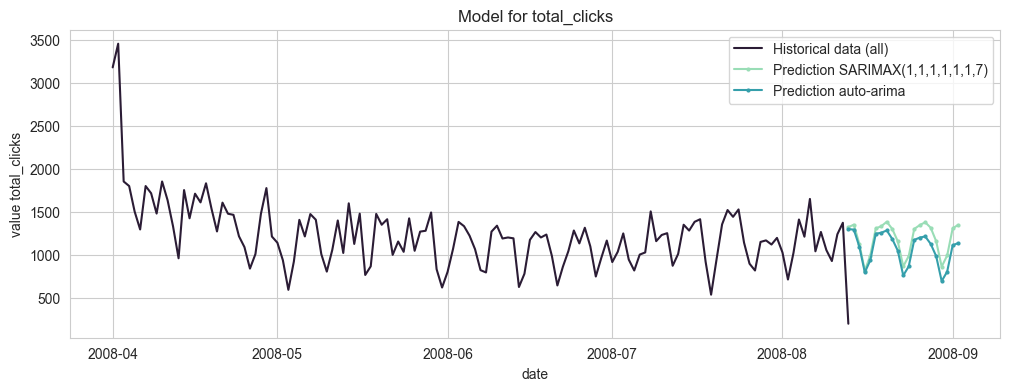

In [64]:
n_steps = 21
exog_train = df_daily[:-1][['weekday', 'weekend']]
forecast_index = pd.date_range(start=df_daily.index[-2] + pd.Timedelta(days=1), periods=n_steps)
exog_forecast = pd.DataFrame({'weekday':forecast_index.weekday,'weekend':(forecast_index.weekday >4).astype('int')}, index=forecast_index)


for column in series_names:
    print('Прогнозирование для',column)

    series_train = df_daily[:-1][column]
    series_train = series_train.asfreq('D')

    model1 = SARIMAX(series_train, 
                    order=(1,1,1), 
                    seasonal_order=(1,1,1,7), 
                    exog=exog_train, 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    model1_fit = model1.fit()


    
    model2 = auto_arima(series_train, 
                       seasonal=True,
                       exogenous = exog_train,
                       m=7, 
                       stepwise=True, 
                       trace=False)
    model2_fit = model2.fit(series_train)
    print(f"\tЛучшие параметры найденные auto-arima (p, d, q): {model2_fit.order}; (P, D, Q, m): {model2_fit.seasonal_order}")
    
    #print(model_fit.summary())

    
    forecast1 = model1_fit.forecast(steps=n_steps, exog = exog_forecast[['weekday','weekend']])
    forecast2 = model2_fit.predict(n_periods=n_steps, exogenous = exog_forecast[['weekday','weekend']], return_conf_int=False)

    
    
    forecast_index = test.index
    plt.figure(figsize=(12, 4))
    plt.plot(df_daily.index, df_daily[column], color = palette_color[0],label='Historical data (all)')
    plt.plot(forecast1.index, forecast1, label='Prediction SARIMAX(1,1,1,1,1,1,7)', color = palette_color[6], marker='o', markersize=2)
    plt.plot(forecast2.index, forecast2, label='Prediction auto-arima', color = palette_color[4], marker='o', markersize=2)
    plt.title(f'Model for {column}')
    plt.xlabel('date')
    plt.ylabel(f'value {column}')
    plt.legend()
    plt.show()
    print()




## 3. Модели кластеризации. Сегментация пользователей (сессий)

### 3.1. Данные о сессиях пользователей

Один из пунктов задания "Используйте методы кластеризации для сегментации пользователей по их поведению"

У нас нет данных по пользователям, но есть данные по сессиям и их уникальным ID. Сгруппируем информацию по сессиям в новую таблицу. Для проверки, кажда ли сессия была в определенный день и страну будем группировать по 3 этим признакам, а потом убедимся, что количество записей в такой таблицу бедет равно количеству уникальных session ID в изначальных данных

Также добавим в данные о сессиях такие дополнительные посчитанные признаки, как: количество кликов в сессии, суммарная стоимость цен просмотренных товаров, средняя цена просмотренных товаров, минимальная, максимальная цена, количество товаров со стоимостью выше средней по категории, количество фотографий в профиль; после формирования таблицы добавим еще признаки долю товаров с ценой выше средней по категории и долю товаров с фото в профиль

In [65]:
sessions = pd.DataFrame(df.groupby(by=['session ID', 'date', 'country','weekday','weekend'], as_index=False).
                        agg(
                            clicks = ('order', 'count'),
                            price_sum = ('price', 'sum'),
                            price_mean = ('price', 'mean'),
                            price_min = ('price', 'min'),
                            price_max = ('price', 'max'),
                            higher_prices_num = ('is_higher_price', 'sum'),
                            photo_profile_num = ('is_photo_profile', 'sum'),
                            
                            # main_page_cat = ('page 1 (main category)', list),
                            # page_cat = ('page 2 (clothing model)', list),
                            
                        )
                       ).set_index('session ID')


sessions['is_higher_price_percentage'] = sessions['higher_prices_num'] / sessions['clicks']
sessions['is_photo_profile_percentage'] = sessions['photo_profile_num'] / sessions['clicks']
print('Совпадает ли количество строк в получившейся таблице с количеством уникальных сессий в df:', sessions.shape[0] == df['session ID'].nunique())
sessions

Совпадает ли количество строк в получившейся таблице с количеством уникальных сессий в df: True


date  country  weekday  weekend  clicks  price_sum  \
session ID                                                            
1          2008-04-01       29        1        0       9        379   
2          2008-04-01       29        1        0      10        500   
3          2008-04-01       21        1        0       6        253   
4          2008-04-01       21        1        0       4        181   
5          2008-04-01        9        1        0       1         57   
...               ...      ...      ...      ...     ...        ...   
24022      2008-08-13       29        2        0       3         89   
24023      2008-08-13       29        2        0       7        246   
24024      2008-08-13       29        2        0       1         67   
24025      2008-08-13        9        2        0       1         62   
24026      2008-08-13       34        2        0       3        143   

            price_mean  price_min  price_max  higher_prices_num  \
session ID                                                        
1            42.111111         28         57                  5   
2            50.000000         38         67                  8   
3            42.166667         28         48                  4   
4            45.250000         33         62                  2   
5            57.000000         57         57                  1   
...                ...        ...        ...                ...   
24022        29.666667         28         33                  0   
24023        35.142857         28         38                  2   
24024        67.000000         67         67                  1   
24025        62.000000         62         62                  1   
24026        47.666667         43         57                  2   

            photo_profile_num  is_higher_price_percentage  \
session ID                                                  
1                           5                    0.555556   
2                           1                    0.800000   
3                           2                    0.666667   
4                           0                    0.500000   
5                           0                    1.000000   
...                       ...                         ...   
24022                       1                    0.000000   
24023                       2                    0.285714   
24024                       0                    1.000000   
24025                       0                    1.000000   
24026                       1                    0.666667   

            is_photo_profile_percentage  
session ID                               
1                              0.555556  
2                              0.100000  
3                              0.333333  
4                              0.000000  
5                              0.000000  
...                                 ...  
24022                          0.333333  
24023                          0.285714  
24024                          0.000000  
24025                          0.000000  
24026                          0.333333  

[24026 rows x 13 columns]

In [66]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24026 entries, 1 to 24026
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         24026 non-null  datetime64[ns]
 1   country                      24026 non-null  int64         
 2   weekday                      24026 non-null  int32         
 3   weekend                      24026 non-null  int32         
 4   clicks                       24026 non-null  int64         
 5   price_sum                    24026 non-null  int64         
 6   price_mean                   24026 non-null  float64       
 7   price_min                    24026 non-null  int64         
 8   price_max                    24026 non-null  int64         
 9   higher_prices_num            24026 non-null  int64         
 10  photo_profile_num            24026 non-null  int64         
 11  is_higher_price_percentage   24026 non-null  f

### 3.2. Понижение размерности признаков (PCA, tSNE)

#### 3.2.1. PCA

PCA (Principal Component Analysis) метод понижения размерности. Эффективность его работы может быть оценена объясненной дисперсией признаков каждой из новых компонент. Для наглядной демонстрации можно использовать так называемый scree plot. 

График scree plot показывает собственные значения (или доли объясненной дисперсии) для каждой компоненты. B суммарную объясненную дисперсию ("накопленную" для 2, 3 и тд компонент).

In [67]:
def display_scree_plot(pca, log_flag_scale=False):
    scree = pca.explained_variance_ratio_*100
    fig, ax = plt.subplots()
    bars = ax.bar(np.arange(len(scree))+1, scree, color = palette_color[3], label='Explained variance by component')
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 3, yval*1.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o', label='Cumulative Explained Variance')
    for i, value in enumerate(scree.cumsum()[1:], start=2):
        ax.text(i-0.2, value*1.01, f'{value:.2f}', ha='center', va='bottom', fontsize=8, c='red')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    if log_flag_scale:
        ax.set_yscale('log')
        plt.title("Scree plot. NB! Y log scale")
    else:
        plt.title("Scree plot")
    plt.xticks(np.arange(1,len(scree)+1,1))
    ax.legend(fontsize=8)
    plt.show(block=False)

In [68]:
sessions.drop(columns='date', inplace=True)

In [69]:
print('Число уникальных стран',sessions['country'].nunique())

Число уникальных стран 47


Проверим как будет работать метод уменьшения размерности PCA с нашими данными sessions, когда предварительно вместо страны, дня недели мы построим sessions_dum с one hot encoding этих фактически категориальных признаков, а затем стандартизацией такого датасета

После кодирования в sessions признаков country, weekday число признаков достигнет:  64
Principal Component 1: 0.064500 variance explained
Principal Component 2: 0.041876 variance explained
Principal Component 3: 0.033540 variance explained
Principal Component 4: 0.028917 variance explained
Principal Component 5: 0.018212 variance explained
Principal Component 6: 0.017794 variance explained
Principal Component 7: 0.017430 variance explained
Principal Component 8: 0.016890 variance explained
Principal Component 9: 0.016709 variance explained
Principal Component 10: 0.016188 variance explained


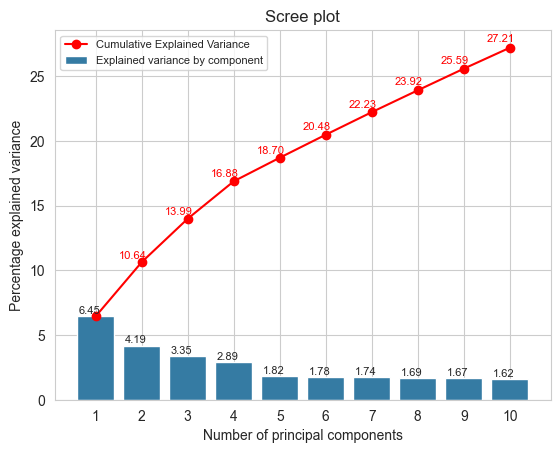

In [70]:
sessions_dum = pd.get_dummies(sessions, columns = ['country','weekday'], dtype='int')
print('После кодирования в sessions признаков country, weekday число признаков достигнет: ',sessions_dum.shape[1] )

stdscaler = StandardScaler()
sessions_scaled = stdscaler.fit_transform(sessions_dum)

pca = PCA(n_components=10)
sessions_pca = pca.fit_transform(sessions_scaled)

for i, variance in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"Principal Component {i}: {variance:.6f} variance explained")
display_scree_plot(pca) 

**Вывод**: Для таких данных не слишком хорошо работает PCA. 10 новых компонент объяснят в сумме только 27,27% дисперсии данных.  А для того, чтобы это визуализировать нам нужны 2 (максимум 3) компоненты которые объяснят только 10.64% (13.98%). Думаю проблема в том, что из 12 колонок с признаками в sessions мы путем кодирования категориальных признаков увеличили их количество до 66

Чтобы PCA работал лучше и мы могли нормально визуализировать будущую кластеризацию, пожертвуем в наших sessions признаками страной и днем недели (останется только информация о том, выходной день или нет)


Principal Component 1: 0.411617 variance explained
Principal Component 2: 0.266460 variance explained
Principal Component 3: 0.101988 variance explained
Principal Component 4: 0.099656 variance explained
Principal Component 5: 0.057823 variance explained
Principal Component 6: 0.039691 variance explained
Principal Component 7: 0.014690 variance explained
Principal Component 8: 0.004942 variance explained
Principal Component 9: 0.002855 variance explained
Principal Component 10: 0.000279 variance explained


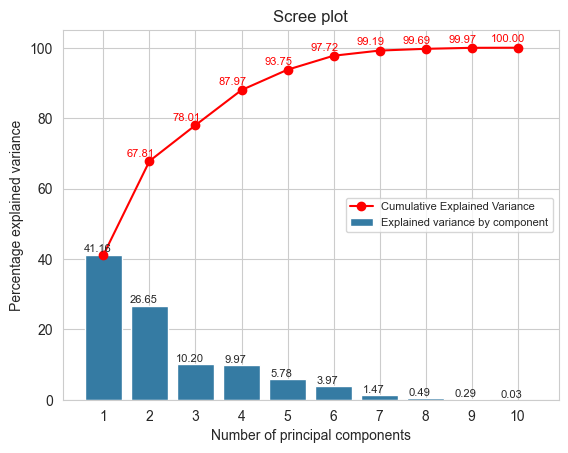

In [71]:
sessions_drop = sessions.drop(columns = ['country', 'weekday'])
stdscaler = StandardScaler()
sessions_scaled = stdscaler.fit_transform(sessions_drop)

pca = PCA(n_components=10)
sessions_pca = pca.fit_transform(sessions_scaled)

for i, variance in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"Principal Component {i}: {variance:.6f} variance explained")

display_scree_plot(pca) 


Без признака страны и дня недели, 3 наших новых PCA компоненты объяснят уже 78% дисперсии. 

В двухмерном пространстве 2 компоненты меньше, 67.81%  дисперсии. Но для удобства работы мы будем использовать преимущественно двухмерные визуализации

И конечно, в целом оставим для дальнейшей работы методов кластеризации именно такой вариант стандартизированных данных по сессиям: sessions_scaled, после которого и будем применять PCA с 2/3 компонентами

In [72]:
pca2 = PCA(n_components=2)
sessions_pca = pca2.fit_transform(sessions_scaled)

pca3 = PCA(n_components=3)
sessions_pca_3d = pca3.fit_transform(sessions_scaled)

Таблица с факторными нагрузками для каждой компоненты, которые можно интерпретировать для понимания влияния признаков на главные компоненты:

In [73]:
factor_loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)
loadings_df = pd.DataFrame(factor_loadings, index=sessions_drop.columns, columns=['Component '+str(i) for i in range(1,3)]).round(4)
loadings_df

Component 1  Component 2
weekend                           0.0075       0.0017
clicks                            0.9820      -0.0006
price_sum                         0.9769       0.0651
price_mean                       -0.0421       0.9630
price_min                        -0.4844       0.6903
price_max                         0.4889       0.6526
higher_prices_num                 0.9584       0.1370
photo_profile_num                 0.8900      -0.1325
is_higher_price_percentage        0.0224       0.8114
is_photo_profile_percentage       0.1050      -0.3687

Визуализация наших данных в двухмерном пространстве с помощью PCA:

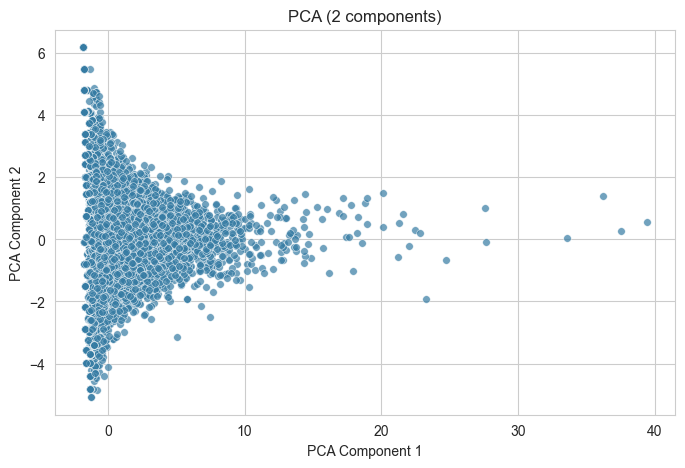

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sessions_pca[:, 0], y=sessions_pca[:, 1], color=palette_color[3], s=30, alpha=0.7)
plt.title('PCA (2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#### 3.2.1. t-SNE

Еще один метод снижения размерности, которым мы попробуем воспользоваться t-SNE (t-Distributed Stochastic Neighbor Embedding). Оценить эффективность результатов его работы гораздо сложнее, чем для PCA (в том числе это предлагается делать с помощью визуализаций кластеризации)

In [75]:
%%time
tsne = TSNE(n_components=2, random_state=42)
sessions_tsne = tsne.fit_transform(sessions_scaled)


tsne3 = TSNE(n_components=3, random_state=42)
sessions_tsne_3d = tsne3.fit_transform(sessions_scaled)

CPU times: total: 22min 5s
Wall time: 20min 25s


Визуализация наших данных в двухмерном пространстве с помощью t-SNE:

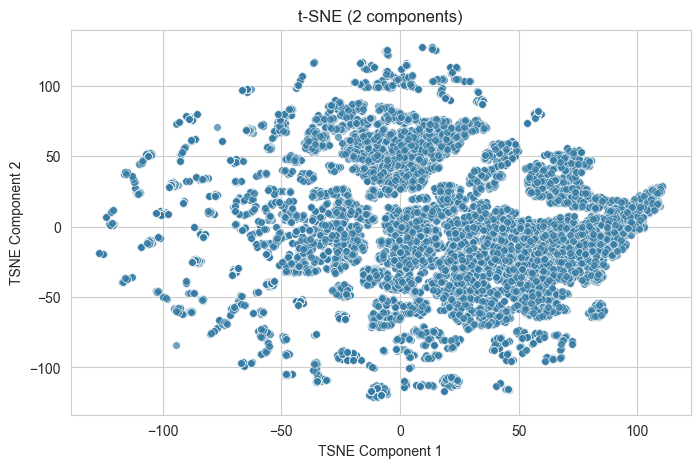

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sessions_tsne[:, 0], y=sessions_tsne[:, 1], color=palette_color[3], s=30, alpha=0.7)
plt.title('t-SNE (2 components)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

## 3.3. Метод k средних (kMeans)

Для кластеризации наших стандартизированных данных sessions_scaled воспользуемся методом K-Means. Начнем с подбора оптимального числа кластеров.

Построим графики для инерции и силуэтного коэффициента для разного числа кластеров от 1 до 15

Выполняется расчет для числа кластеров 1...выполнено
Выполняется расчет для числа кластеров 2...выполнено
Выполняется расчет для числа кластеров 3...выполнено
Выполняется расчет для числа кластеров 4...выполнено
Выполняется расчет для числа кластеров 5...выполнено
Выполняется расчет для числа кластеров 6...выполнено
Выполняется расчет для числа кластеров 7...выполнено
Выполняется расчет для числа кластеров 8...выполнено
Выполняется расчет для числа кластеров 9...выполнено
Выполняется расчет для числа кластеров 10...выполнено
Выполняется расчет для числа кластеров 11...выполнено
Выполняется расчет для числа кластеров 12...выполнено
Выполняется расчет для числа кластеров 13...выполнено
Выполняется расчет для числа кластеров 14...выполнено
Выполняется расчет для числа кластеров 15...выполнено


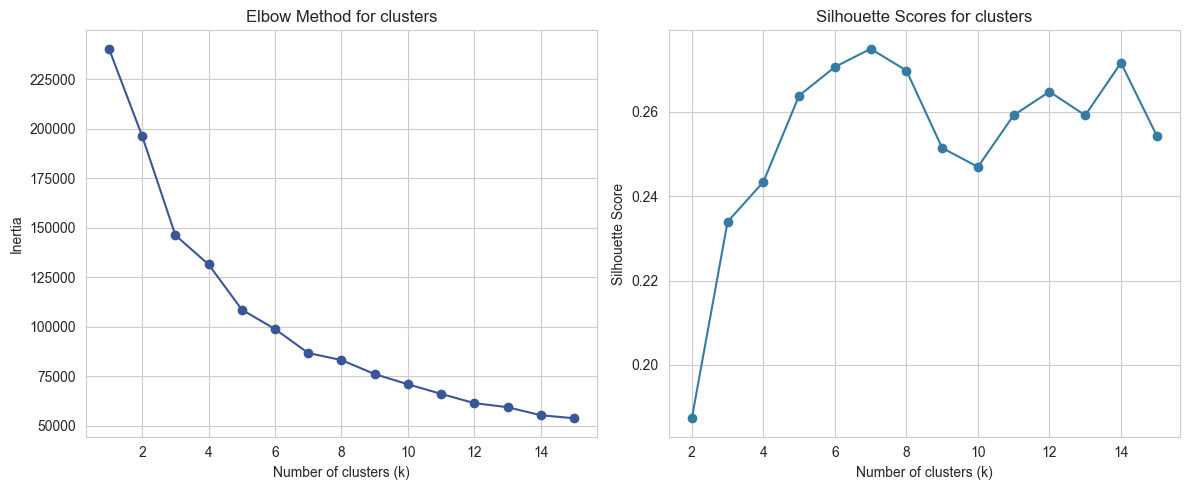

CPU times: total: 1min 51s
Wall time: 2min 50s


In [77]:
%%time 

max_clusters = 15
inertia, silhouette_scores = [], []
clusters_range = range(1, max_clusters+1)  

for k in clusters_range:
    print(f'Выполняется расчет для числа кластеров {k}', end='...')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sessions_scaled)
    labels = kmeans.fit_predict(sessions_scaled)
    
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(sessions_scaled, labels))
    print('выполнено')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, inertia, marker='o', linestyle='-', color=palette_color[2])
plt.title('Elbow Method for clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(clusters_range[1:], silhouette_scores, marker='o', linestyle='-', color=palette_color[3])
plt.title('Silhouette Scores for clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


Исходя из представленных графиков и вычислений можно сделать вывод, что оптимальное число кластеров = 7. 

Это будет не так очевидно на графике с инерцией по методу локтя, но на помощь нам пришел метод силуэтного анализа, где видно что при 7 кластерах будет достигнут максимум силуэтного коэффициента

In [78]:
k_opt = 7
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters_kmeans = kmeans.fit_predict(sessions_scaled)

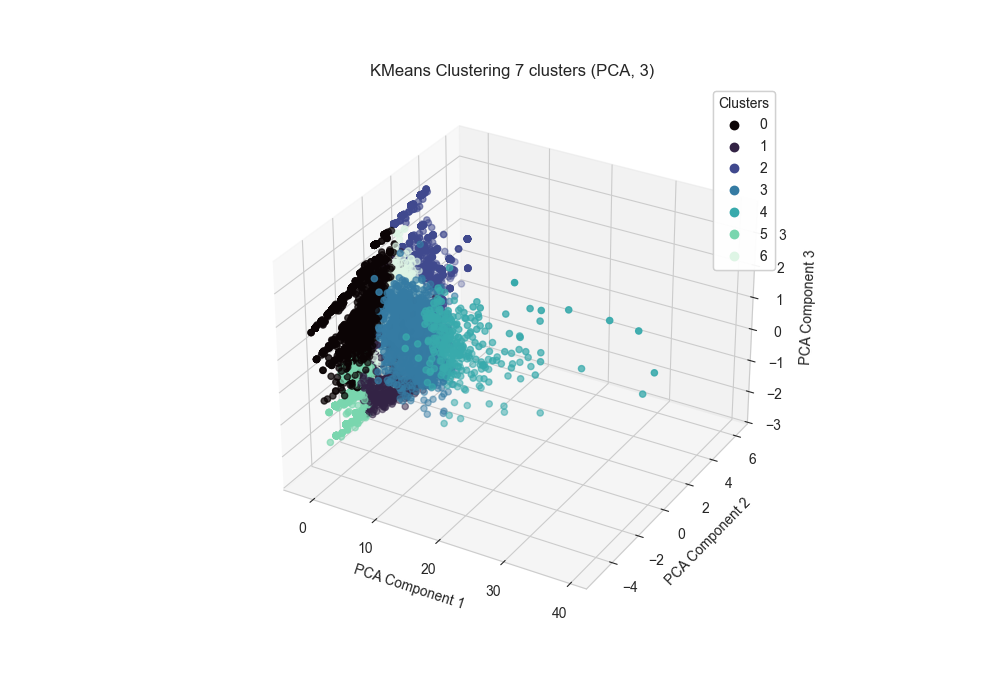

In [84]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sessions_pca_3d[:, 0], sessions_pca_3d[:, 1], sessions_pca_3d[:, 2], c=clusters_kmeans, cmap='mako')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title('KMeans Clustering 7 clusters (PCA, 3)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.ion()
plt.show()

In [85]:
%matplotlib inline

Визуализируем наши 7 кластеров и центроиды в двухмерном пространстве:

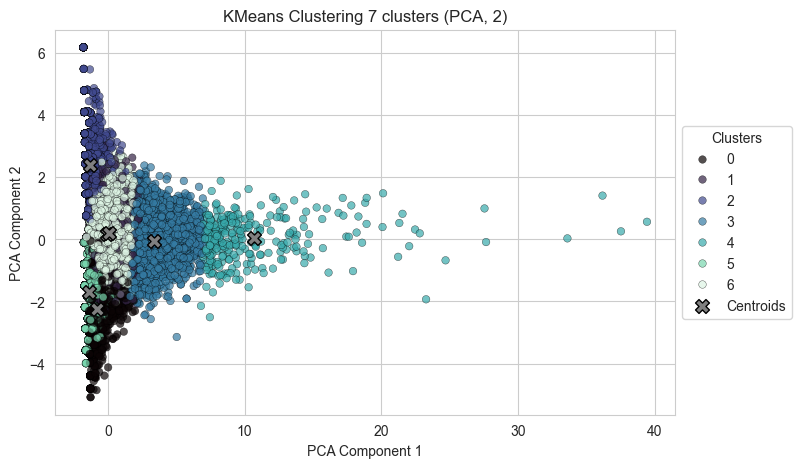

In [87]:
centroids = pca2.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=sessions_pca[:, 0], y=sessions_pca[:, 1], hue=clusters_kmeans, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='gray', s=100, marker='X', label='Centroids', edgecolor='black')

plt.title('KMeans Clustering 7 clusters (PCA, 2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Метод t-SNE не имеет возможности трансформировать координаты наших центроидов, чтобы их можно было отметить на ка визуализации выше, но мы все равно можем показать распределение наших кластеров в координатах, полученных с помощью t-SNE

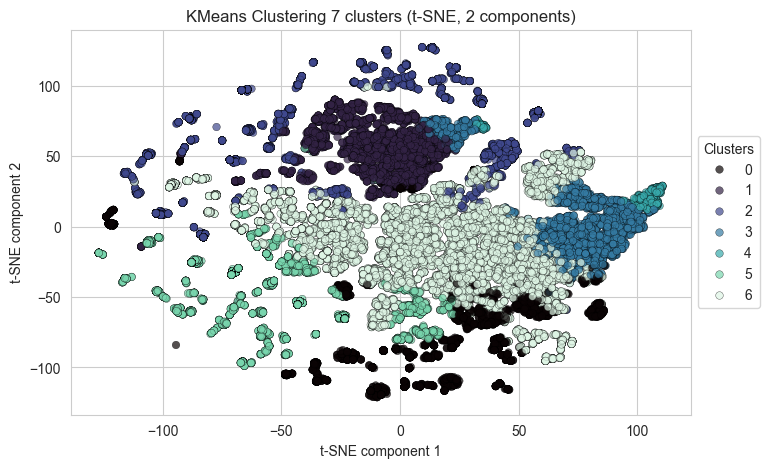

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=sessions_tsne[:, 0], y=sessions_tsne[:, 1], hue=clusters_kmeans, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.title("KMeans Clustering 7 clusters (t-SNE, 2 components)")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(title = 'Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## 3.4. Метод KPrototypes

Данный вид кластеризации работает с категориальными признаками. Поэтому к нашим данным sessions_scaled мы обратно вернем стобцы 'country', 'weekday' из sessions. И на полученном наборе данных будем искать оптимальное число кластеров для метода KPrototypes с указанием двух последних столбцов как категориальных

In [88]:
session_scaled_w_cat = np.concatenate((sessions_scaled, np.array(sessions[['country','weekday']].astype('category'))), axis=1)

Выполняется расчет для числа кластеров 1... - выполнено
Выполняется расчет для числа кластеров 2... - выполнено
Выполняется расчет для числа кластеров 3... - выполнено
Выполняется расчет для числа кластеров 4... - выполнено
Выполняется расчет для числа кластеров 5... - выполнено
Выполняется расчет для числа кластеров 6... - выполнено
Выполняется расчет для числа кластеров 7... - выполнено
Выполняется расчет для числа кластеров 8... - выполнено
Выполняется расчет для числа кластеров 9... - выполнено
Выполняется расчет для числа кластеров 10... - выполнено


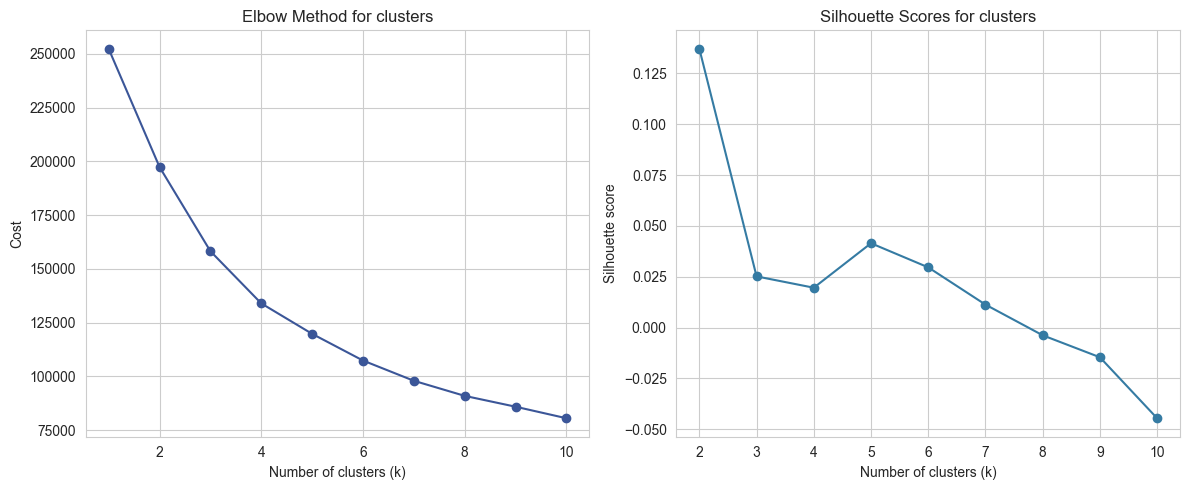

CPU times: total: 2h 33min 45s
Wall time: 2h 58min 40s


In [89]:
%%time

costs = []
silhouette_scores = []
max_clusters = 10
clusters_range = range(1, max_clusters+1)  

for k in clusters_range:
    print(f'Выполняется расчет для числа кластеров {k}', end='...')
    kproto = KPrototypes(n_clusters=k, random_state=42)
    clusters = kproto.fit_predict(session_scaled_w_cat, categorical=[10,11])
    costs.append(kproto.cost_)
    if k > 1:
        distances = pairwise_distances(session_scaled_w_cat, metric='euclidean')
        silhouette_s = silhouette_score(distances, clusters)
        silhouette_scores.append(silhouette_s)
        del distances, silhouette_s
    del kproto, clusters
    print(' - выполнено')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, costs, marker='o', linestyle='-', color=palette_color[2])
plt.title('Elbow Method for clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(clusters_range[1:], silhouette_scores, marker='o', linestyle='-', color=palette_color[3])
plt.title('Silhouette Scores for clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.tight_layout()
plt.show()

Получим метки для кластеризации KPrototypes (с учетом категориальных переменных) для числа кластеров 2 и 5

In [90]:
%%time
kproto2 = KPrototypes(n_clusters=2, random_state=42)
clusters_kproto2 = kproto2.fit_predict(session_scaled_w_cat, categorical=[10,11])

kproto5 = KPrototypes(n_clusters=5, random_state=42)
clusters_kproto5 = kproto5.fit_predict(session_scaled_w_cat, categorical=[10,11])

CPU times: total: 4min 46s
Wall time: 6min 41s


Построим визуализации 

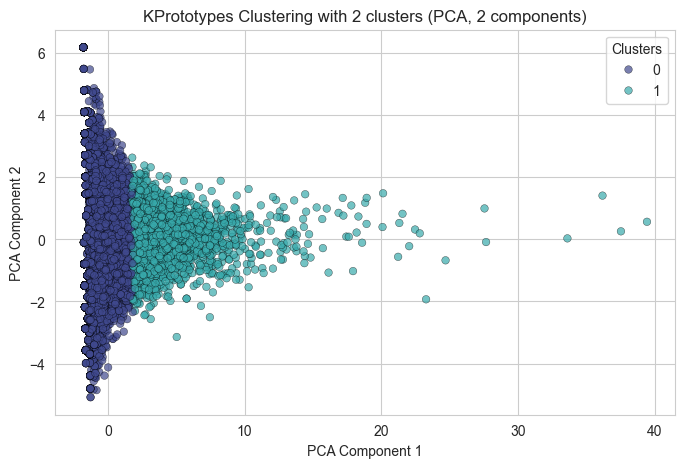

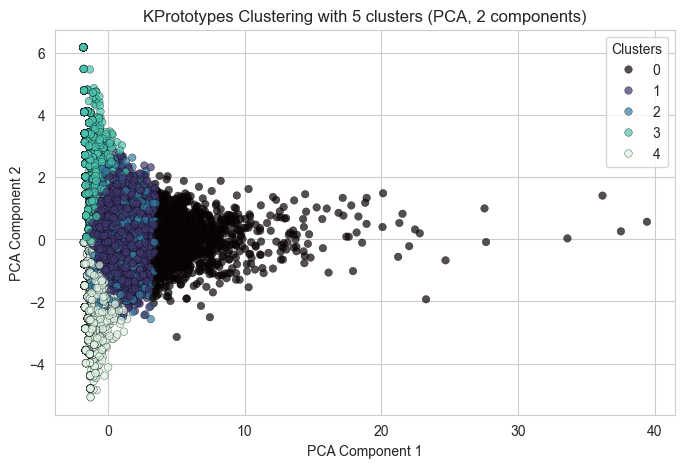

In [91]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sessions_pca[:, 0], y=sessions_pca[:, 1], hue=clusters_kproto2, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.title('KPrototypes Clustering with 2 clusters (PCA, 2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=sessions_pca[:, 0], y=sessions_pca[:, 1], hue=clusters_kproto5, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.title('KPrototypes Clustering with 5 clusters (PCA, 2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()

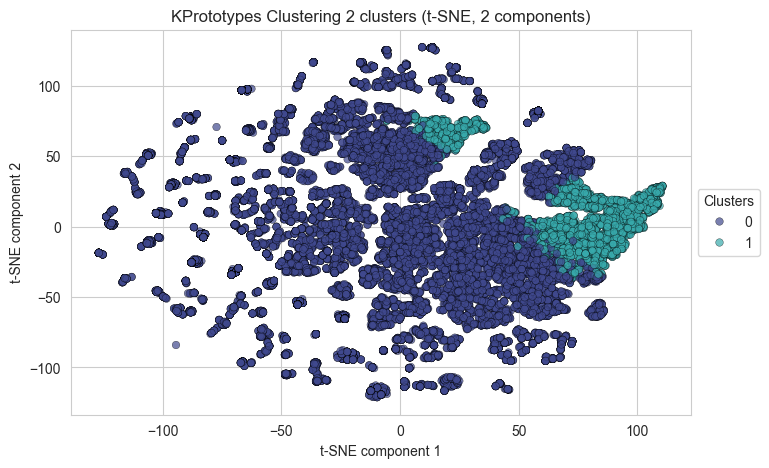

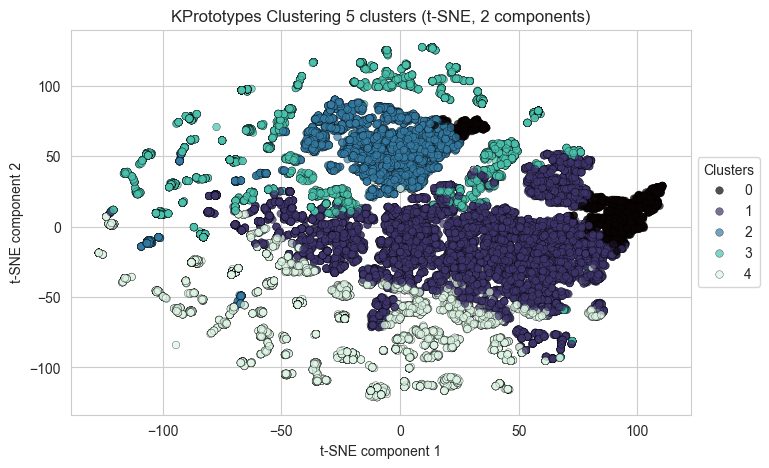

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=sessions_tsne[:, 0], y=sessions_tsne[:, 1], hue=clusters_kproto2, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.title("KPrototypes Clustering 2 clusters (t-SNE, 2 components)")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(title = 'Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=sessions_tsne[:, 0], y=sessions_tsne[:, 1], hue=clusters_kproto5, palette='mako', legend='full', edgecolor='k', linewidths=0.3, marker='o', s=30, alpha=0.7)
plt.title("KPrototypes Clustering 5 clusters (t-SNE, 2 components)")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(title = 'Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

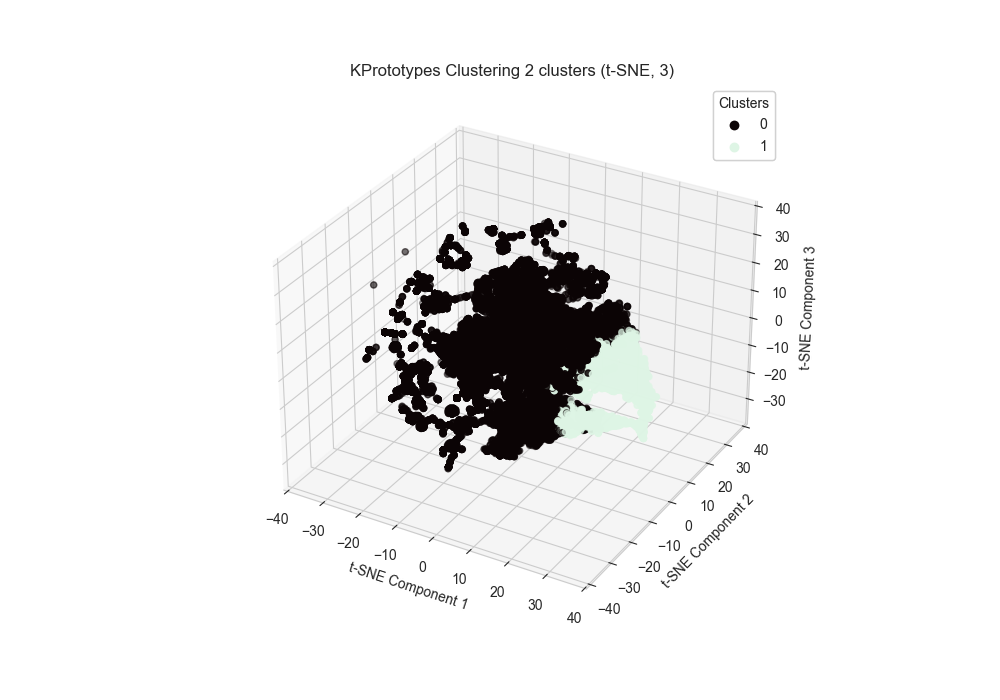

In [93]:
%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sessions_tsne_3d[:, 0], sessions_tsne_3d[:, 1], sessions_tsne_3d[:, 2], c=clusters_kproto2, cmap='mako')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title('KPrototypes Clustering 2 clusters (t-SNE, 3)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.ion()
plt.show()

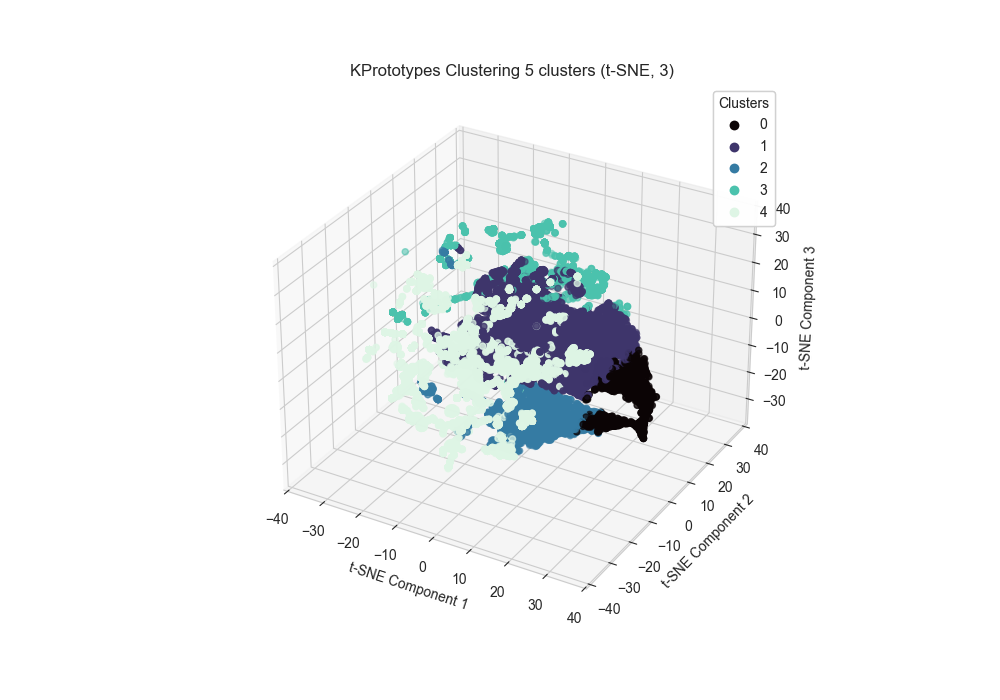

In [94]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sessions_tsne_3d[:, 0], sessions_tsne_3d[:, 1], sessions_tsne_3d[:, 2], c=clusters_kproto5, cmap='mako')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title('KPrototypes Clustering 5 clusters (t-SNE, 3)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.ion()
plt.show()

In [96]:
%matplotlib inline

## 3.5. Интерпретация результатов кластеризации

Попробуем интерпретировать результаты кластеризации. Для этого добавим к таблице sessions новый признак - метки кластеров. Будем использовать результаты работы метода kPrototypes с 5 кластерами (хотя можно рассмотреть и результаты других наших проведенных кластеризаций, конечно)

Посчитаем, какое количество сессий попало в каждый такой кластер

In [97]:
sessions['cluster'] = clusters_kproto5
#sessions['cluster'] = clusters_kmeans

sessions['cluster'].value_counts()

cluster
1    9124
4    5485
3    4712
2    3451
0    1254
Name: count, dtype: int64

In [98]:
%matplotlib inline

Визуализация распределения количества кликов по кластерам (без выбросов для наглядности). 

Очевидно, кластеризация kPrototypes "почувствовала" разные распределения, самые длинные сессии по числу кликов и самые большие по сумме цен на просмотренные товары попали в кластер №0

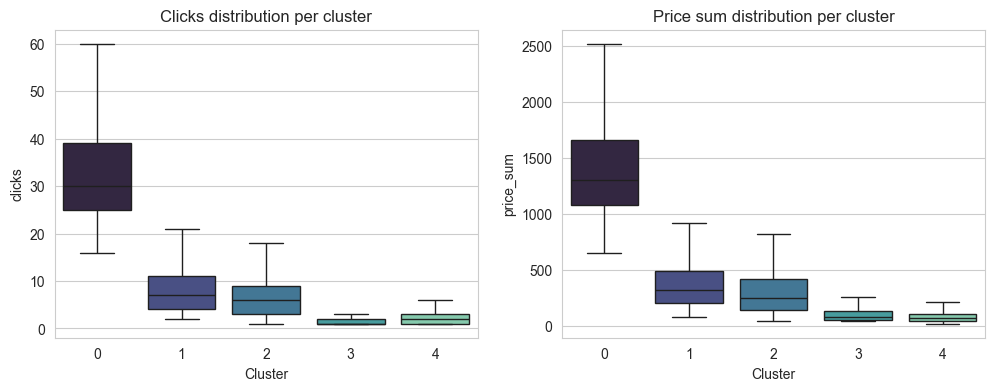

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data = sessions, x='cluster', y ='clicks', palette='mako', showfliers=False )
plt.title('Сlicks distribution per cluster')
plt.xlabel('Cluster')


plt.subplot(1,2,2)
sns.boxplot(data = sessions, x='cluster', y ='price_sum', palette='mako', showfliers=False)
plt.title('Price sum distribution per cluster')
plt.xlabel('Cluster')
plt.show()

plt.show()

Можно ли при этом сказать, что кластеризация разделила по кластерам страны - наверное нет, не слишком похоже (страна под кодом 29 - Польша, самая многочисленная, основная её часть все таки попала в кластер №1)

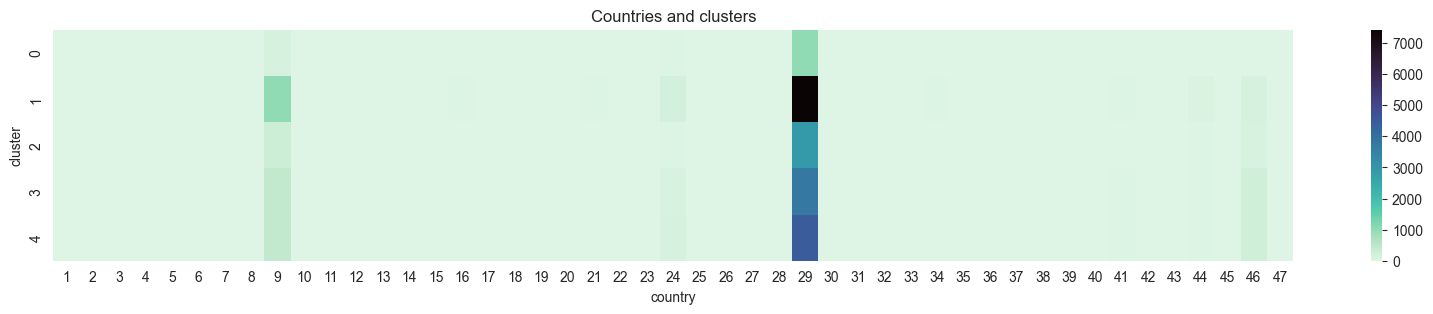

In [101]:
country_clusters_pivot = pd.pivot_table(sessions, columns ='country', index='cluster', values='clicks', aggfunc='count', fill_value=0)
plt.figure(figsize=(20,3))
sns.heatmap(country_clusters_pivot, vmin=0, cmap=sns.color_palette("mako_r", as_cmap=True))
plt.title('Countries and clusters')
plt.show()

Учтено ли в кластеризации распределение по дням недели, ту категорию, за которую мы тоже "боролись" с помощью KPrototypes? Лучше, чем страны, но гораздо менее очевидно, чем просто признак weekend

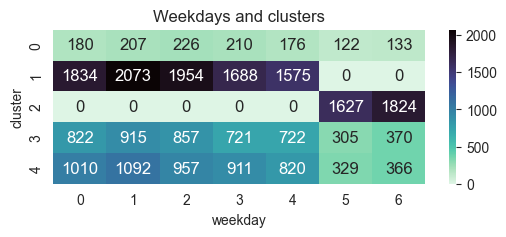

In [102]:
weekday_clusters_pivot = pd.pivot_table(sessions, columns ='weekday', index='cluster', values='clicks', aggfunc='count', fill_value=0)
plt.figure(figsize=(6,2))
sns.heatmap(weekday_clusters_pivot, vmin=0, annot=True, fmt=".0f", cmap=sns.color_palette("mako_r", as_cmap=True), annot_kws={'size': 12})
plt.title('Weekdays and clusters')
plt.show()

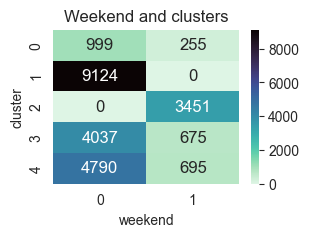

In [103]:
weekend_clusters_pivot = pd.pivot_table(sessions, columns ='weekend', index='cluster', values='clicks', aggfunc='count', fill_value=0)
plt.figure(figsize=(3,2))
sns.heatmap(weekend_clusters_pivot, vmin=0, annot=True, fmt=".0f", cmap=sns.color_palette("mako_r", as_cmap=True), annot_kws={'size': 12})
plt.title('Weekend and clusters')
plt.show()

**Вывод**:

Воспользовавшись разными методами кластеризации (KMeans, KPrototypes) мы провели сегментацию пользователей, найдя оптимальное число кластеров для каждого метода и визуализировав результаты кластеризации методами понижения размерности (PCA, t-SNE)

В качестве основных идеи были кластеризации на 7 категорий для KMeans, 2 и 5 для KPrototypes. Были интерпретированы некоторые результаты кластеризации с исходными признаками сессий пользователей sessions.

Конечно, если бы наши данные включали информацию об итоговых действиях пользователей (например, совершенных покупках), то наша кластеризация имела бы еще больший практический смысл и можно было бы соотнести для каждой категории сессии рекомендованные действия для достижения большего числа продаж для каждого кластера пользователей.

# 4. Заключение

В данной работе был проведен анализ данных, исправлены ошибки, преобразованы некоторые признаки, в том числе были сформированы новые признаки из имеющихся данных. Построены визуализации зависимостей в данных относительно имеющихся признаков. Визуализированы диаграммы, показывающие взаимодействие пользователей с сайтом.

Сформированы данные о продуктах сайта, сделаны выводы о возможных изменениях в представленных продуктах.

Сформированы данные о дневных количествах сессий, количествах кликов - временные ряды. Построены модели временных рядов для прогнозирования количества кликов и сессий, модели оценены по метрикам качества.

Разными методами кластеризации построены модели для сегментации сессий(пользователей) по их поведению для определения ключевых пользовательских групп. С помощью методов понижения размерности данные кластеризации были визуализированы в двумерном и трехмерном пространствах

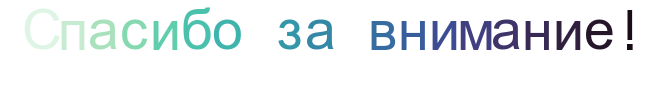

In [104]:
plt.figure(figsize=(8, 1))
text = 'Спасибо за внимание!'
for i in range(len(text)):
    plt.text(0.05 + i*0.05, 0.5, text[i], fontsize=40, color=cmap(i / len(text)), ha='center')
plt.axis('off')
plt.show()